# Are you happy? An analysis of the World Happiness Report and Suicide Rates Overview data

## Introduction

### Motivation

I recently took a [course about happiness](https://www.coursera.org/learn/the-science-of-well-being) which made me rethink my approach to achieving happiness. The course mentioned some crucial contributing factors such as deep relationships, giving, or cherishing as things that, according to science, *truly* make us happy.

This made me think - how is happiness "distributed" around the world, how has it changed over time, and what can we learn about it by studying data showing two extremes: happiness and suicide?

### Data
Naturally, collecting data about happiness and suicides myself would be costly and time-consuming. Therefore, I decided that the next best thing will be to find datasets on the Internet. Unsurprisingly, there are datasets covering both topics on Kaggle: the [World Happiness Report (up to 2020)](https://www.kaggle.com/mathurinache/world-happiness-report) and [Suicide Rates Overview (1985 - 2016)](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016).

### Approach
Rather than analyzing each dataset separately, I thought it would be interesting to join them together and try to see if / what we can learn by studying happiness not only implicitly, but also by looking at suicide rates. The reason is simple - suicidal people are more likely to be unhappy on average, so we would expect to see some inverse correlations.

# Data preparation

## Data cleaning

Let's first have a quick look at both datasets to figure out how to merge them.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_happiness_2015 = pd.read_csv("data/world_happiness_report/2015.csv")
data_happiness_2016 = pd.read_csv("data/world_happiness_report/2016.csv")
data_happiness_2017 = pd.read_csv("data/world_happiness_report/2017.csv")
data_happiness_2018 = pd.read_csv("data/world_happiness_report/2018.csv")
data_happiness_2019 = pd.read_csv("data/world_happiness_report/2019.csv")
data_happiness_2020 = pd.read_csv("data/world_happiness_report/2020.csv")

In [3]:
data_happiness_2015.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
data_happiness_2020.head(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


We can already see that not only do some column names have different names, but also we have different sets of columns depending on the year data was collected. This means we will have to:

1. Agree on which columns to keep
2. Agree on common names for these columns

### Column name cleanup

In [5]:
data_happiness_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
data_happiness_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [7]:
data_happiness_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [8]:
data_happiness_2018.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [9]:
data_happiness_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [10]:
data_happiness_2020.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

Below, I'll list the concepts which columns describe for each dataset:

1. Country:
    - 2015: Country
    - 2016: Country
    - 2017: Country
    - 2018: Country or region
    - 2019: Country or region
    - 2020: Country name
2. Happiness score:
    - 2015: Happiness Score
    - 2016: Happiness Score
    - 2017: Happiness.Score
    - 2018: Score
    - 2019: Score
    - 2020: Ladder score
3. GDP per capita:
    - 2015: Economy (GDP per Capita)
    - 2016: Economy (GDP per Capita)
    - 2017: Economy..GDP.per.Capita.
    - 2018: GDP per capita
    - 2019: GDP per capita
    - 2020: Logged GDP per capita
4. Family: 
    - 2015: Family
    - 2016: Family
    - 2017: Family
    - 2018: Social support
    - 2019: Social support
    - 2020: Social support
5. Health:
    - 2015: Health (Life Expectancy)
    - 2016: Health (Life Expectancy)
    - 2017: Health..Life.Expectancy.
    - 2018: Healthy life expectancy
    - 2019: Healthy life expectancy
    - 2020: Healthy life expectancy
6. Freedom: 
    - 2015: Freedom
    - 2016: Freedom
    - 2017: Freedom
    - 2018: Freedom to make life choices
    - 2019: Freedom to make life choices
    - 2020: Freedom to make life choices
7. Trust:
    - 2015: Trust (Government Corruption)
    - 2016: Trust (Government Corruption)
    - 2017: Trust..Government.Corruption.
    - 2018: Perceptions of corruption
    - 2019: Perceptions of corruption
    - 2020: Perceptions of corruption
8. Generosity:
    - 2015: Generosity
    - 2016: Generosity
    - 2017: Generosity
    - 2018: Generosity
    - 2019: Generosity
    - 2020: Generosity
    
Additionally, we will keep a column "Region" in all datasets based on the values of that column in the most recent dataset where it was still present (2016).

The above list clearly illustrates why data cleaning is such a crucial and time-consuming step before any data analysis. Now that we know how to merge these datasets using column names, let's change the column names to the common ones to facilitate further data cleaning.

In [11]:
# Create a mapping of country name to region, will be useful for further analysis
region_mapping = pd.Series(data_happiness_2016.Region.values, index=data_happiness_2016.Country).to_dict()

class ColumnCleaner:
    def __init__(self, df_list, region_mapping):
        if len(df_list) <= 0:
            raise IndexError("Empty list was provided")
            
        self.df_list = df_list
        self.region_mapping = region_mapping
        
        # Define sets mapping to common column names
        self.country_set = {"Country", "Country or region", "Country name"}
        self.happiness_set = {"Happiness Score", "Happiness.Score", "Score", "Ladder score"}
        self.gdp_set = {"Economy (GDP per Capita)", "Economy..GDP.per.Capita.", "GDP per capita", "Logged GDP per capita"}
        self.family_set = {"Family", "Social support"}
        self.health_set = {"Health (Life Expectancy)", "Health..Life.Expectancy.", "Healthy life expectancy"}
        self.freedom_set = {"Freedom", "Freedom to make life choices"}
        self.trust_set = {"Trust (Government Corruption)", "Trust..Government.Corruption.", "Perceptions of corruption"}
        self.generosity_set = {"Generosity"}
        self.set_list = [self.country_set, self.happiness_set, self.gdp_set, self.family_set, self.health_set, 
                         self.freedom_set, self.trust_set, self.generosity_set]
        
        # Define common names to use for concepts
        self.common_names = ["Country", "Happiness", "GDP", "Family", "Health", "Freedom", "Trust", "Generosity"]
        
    # Remap column names
    def remap_column_names(self, df):
        for i in range(len(self.set_list)):
            column_name_current = list(self.set_list[i].intersection(df.columns))[0]
            df = df.rename(columns = {column_name_current: self.common_names[i]})
            
        return df

    # Drop unnecessary columns in-place
    def drop_columns(self, df):
        return df[df.columns[df.columns.isin(self.common_names)]]
    
    # Add a "Region" column. Apply this function after remapping column names
    def add_region_column(self, df):
        df["Region"] = df["Country"].map(self.region_mapping)
        
        return df
    
    # Apply all functions
    def process(self):
        df_list_out = []
        
        for df in self.df_list:
            df = self.remap_column_names(df)
            df = self.drop_columns(df)
            df = self.add_region_column(df)
            df_list_out.append(df)
        return df_list_out

In [12]:
column_cleaner = ColumnCleaner([data_happiness_2015, data_happiness_2016, data_happiness_2017, 
                               data_happiness_2018, data_happiness_2019, data_happiness_2020], region_mapping)
data_new = column_cleaner.process()

# Add a "Year" column to facilitate temporal analysis on the merged dataset
data_new[0]["Year"] = 2015
data_new[1]["Year"] = 2016
data_new[2]["Year"] = 2017
data_new[3]["Year"] = 2018
data_new[4]["Year"] = 2019
data_new[5]["Year"] = 2020

Let's now make sure that the column names are renamed, and that only the columns we care about are there:

In [13]:
for i in range(1, len(data_new)):
    column_names_previous = set(data_new[i - 1].columns)
    column_names_current = set(data_new[i].columns)
    assert column_names_previous == column_names_current

### Column values scales

Great! Looks like the column names are standardized, and the column sets constant across datasets. Did we miss anything?

We did. When merging datasets generated at different points in time, it's crucial to ask yourself: are the variables measured on identical scales across time? Let's compare data from 2015 and 2020:

In [14]:
data_new[0].describe()

,Happiness,GDP,Family,Health,Freedom,Trust,Generosity,Year
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.0
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2015.0
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.0
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.0
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,2015.0
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2015.0
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309882,2015.0
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,2015.0


In [15]:
data_new[5].describe()

,Happiness,GDP,Family,Health,Freedom,Generosity,Trust,Year
count,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.0
mean,5.47324,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120,2020.0
std,1.11227,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172,0.0
min,2.56690,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784,2020.0
25%,4.72410,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019,2020.0
50%,5.51500,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122,2020.0
75%,6.22850,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151,2020.0
max,7.80870,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585,2020.0


Note that all variables from the 2015 dataset (except for Happiness) have a minimum value of 0, and varying max values (even > 1). On the other hand, no variables from 2020 have a min = 0, and some even have negative minimum values! This suggests that either the data collection process was different, or that some modification was (wasn't?) done to the data after it was collected.

What can be done about this? The safest approach would be to discard the dataset, since we don't know if data collection methods were the same. Another option is to scale the variables to range 0-1 instead. A potential disadvantage is that the original variables' values might have shifted over time, and standardizing each dataset to be in the 0-1 range could remove information about such shifts.

The [Statistical Appendix](https://happiness-report.s3.amazonaws.com/2020/WHR20_Ch2_Statistical_Appendix.pdf) for the 2020 dataset explains the ranges and meanings of values for each column. However, there seem to be some discrepancies between the appendix and values of columns for 2015 - 2019 datasets, e.g. the "Family" column is missing from the Appendix. Moreover, the "Health" column has fractional values roughly in the range 0 - 1, while the Appendix states that these values should measure the life expectancy in years.

Based on the above caveats, it will be safest to discard the 2020 dataset and merge the 2015 - 2019 datasets without any modifications in variable values, as it seems that they are measured on the same scales.

In [16]:
# Exclude the 2020 dataset
data_new = data_new[:-1]

In [17]:
data_happiness_concat = pd.concat(data_new)
data_happiness_concat.describe()

,Happiness,GDP,Family,Health,Freedom,Trust,Generosity,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000,782.000000
mean,5.379018,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576,2016.993606
std,1.127456,0.407340,0.329548,0.248309,0.152880,0.105816,0.122321,1.417364
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,4.509750,0.606500,0.869363,0.440183,0.309767,0.054000,0.130000,2016.000000
50%,5.322000,0.982205,1.124735,0.647310,0.431000,0.091000,0.201982,2017.000000
75%,6.189500,1.236187,1.327250,0.808000,0.531000,0.156030,0.278832,2018.000000
max,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,2019.000000


### Missing values

Looks like the happiness data got merged successfully! Let's now quickly look at whether there are any NA values, most likely due to mapping country names to region names:

In [18]:
data_happiness_concat.isna().sum()

Country        0
Happiness      0
GDP            0
Family         0
Health         0
Freedom        0
Trust          1
Generosity     0
Region        25
Year           0
dtype: int64

As suspected, we have 25 rows with NA values in the "Region" column. What are these?

In [19]:
data_happiness_concat.isna().sum()

Country        0
Happiness      0
GDP            0
Family         0
Health         0
Freedom        0
Trust          1
Generosity     0
Region        25
Year           0
dtype: int64

In [20]:
data_happiness_concat[data_happiness_concat.isna().any(axis = 1)]

,Country,Happiness,GDP,Family,Health,Freedom,Trust,Generosity,Region,Year
21,Oman,6.853,1.360110,1.081820,0.762760,0.632740,0.325240,0.215420,NaN,2015
90,Somaliland region,5.057,0.188470,0.951520,0.438730,0.465820,0.399280,0.503180,NaN,2015
93,Mozambique,4.971,0.083080,1.026260,0.091310,0.340370,0.156030,0.222690,NaN,2015
96,Lesotho,4.898,0.375450,1.041030,0.076120,0.317670,0.125040,0.163880,NaN,2015
100,Swaziland,4.867,0.712060,1.072840,0.075660,0.306580,0.030600,0.182590,NaN,2015
125,Djibouti,4.369,0.440250,0.592070,0.362910,0.460740,0.281050,0.180930,NaN,2015
147,Central African Republic,3.678,0.078500,0.000000,0.066990,0.488790,0.082890,0.238350,NaN,2015
32,Taiwan Province of China,6.422,1.433627,1.384565,0.793984,0.361467,0.063829,0.258360,NaN,2017
70,"Hong Kong S.A.R., China",5.472,1.551675,1.262791,0.943062,0.490969,0.293934,0.374466,NaN,2017
112,Mozambique,4.550,0.234306,0.870701,0.106654,0.480791,0.179436,0.322228,NaN,2017


Since there are only 25 rows, we can fix these missing value manually:

In [21]:
data_happiness_concat["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       nan, 'Southeastern Asia', 'Central and Eastern Europe',
       'Eastern Asia', 'Sub-Saharan Africa', 'Southern Asia'],
      dtype=object)

In [22]:
data_happiness_concat.loc[21, "Region"] = "Middle East and Northern Africa"
data_happiness_concat.loc[90, "Region"] = "Sub-Saharan Africa"
data_happiness_concat.loc[93, "Region"] = "Sub-Saharan Africa"
data_happiness_concat.loc[96, "Region"] = "Sub-Saharan Africa"
data_happiness_concat.loc[100, "Region"] = "Sub-Saharan Africa"
data_happiness_concat.loc[125, "Region"] = "Sub-Saharan Africa"
data_happiness_concat.loc[147, "Region"] = "Sub-Saharan Africa"
data_happiness_concat.loc[32, "Region"] = "Eastern Asia"
data_happiness_concat.loc[70, "Region"] = "Eastern Asia"
data_happiness_concat.loc[112, "Region"] = "Sub-Saharan Africa"
data_happiness_concat.loc[138, "Region"] = "Sub-Saharan Africa"
data_happiness_concat.loc[154, "Region"] = "Sub-Saharan Africa"
data_happiness_concat.loc[19, "Region"] = "Middle East and Northern Africa"
data_happiness_concat.loc[37, "Region"] = "Sub-Saharan Africa"
data_happiness_concat.loc[57, "Region"] = "Central and Eastern Europe"
data_happiness_concat.loc[122, "Region"] = "Sub-Saharan Africa"
data_happiness_concat.loc[140, "Region"] = "Sub-Saharan Africa"
data_happiness_concat.loc[154, "Region"] = "Sub-Saharan Africa"
data_happiness_concat.loc[38, "Region"] = "Sub-Saharan Africa"
data_happiness_concat.loc[63, "Region"] = "Central and Eastern Europe"
data_happiness_concat.loc[83, "Region"] = "Central and Eastern Europe"
data_happiness_concat.loc[119, "Region"] = "Sub-Saharan Africa"
data_happiness_concat.loc[122, "Region"] = "Sub-Saharan Africa"
data_happiness_concat.loc[134, "Region"] = "Sub-Saharan Africa"
data_happiness_concat.loc[143, "Region"] = "Sub-Saharan Africa"
data_happiness_concat.loc[154, "Region"] = "Sub-Saharan Africa"

Let's check the remaining NA values:

In [23]:
data_happiness_concat.isna().sum()

Country       0
Happiness     0
GDP           0
Family        0
Health        0
Freedom       0
Trust         1
Generosity    0
Region        0
Year          0
dtype: int64

In [24]:
data_happiness_concat[data_happiness_concat.isna().any(axis = 1)]

,Country,Happiness,GDP,Family,Health,Freedom,Trust,Generosity,Region,Year
19,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,NaN,0.186,Middle East and Northern Africa,2018


To preserve data for temporal analysis, let's impute the missing "Trust" value with mean values from other years for UAE:

In [25]:
mean_trust_uae = round(np.mean(data_happiness_concat[data_happiness_concat["Country"] == "United Arab Emirates"]["Trust"]), 3)
data_happiness_concat.loc[19, "Trust"] = mean_trust_uae

In [26]:
data_happiness_concat.iloc[[19]]

,Country,Happiness,GDP,Family,Health,Freedom,Trust,Generosity,Region,Year
19,United Arab Emirates,6.901,1.42727,1.12575,0.80925,0.64157,0.312,0.26428,Middle East and Northern Africa,2015


At this point, the merged happiness dataset looks fairly decent! Let's move on to see how we can merge the suicide dataset:

In [27]:
data_suicide = pd.read_csv("data/suicide_rates_overview/master.csv")
data_suicide.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [28]:
data_suicide.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


It seems like the "HDI for year" column might have most or all empty values, let's check this:

In [29]:
np.mean(data_suicide["HDI for year"].isna())

0.699352983465133

Almost 70% of values are NA - let's drop this column:

In [30]:
data_suicide = data_suicide.drop(["HDI for year"], axis = 1)

We can also remove the "country-year" column, as it's just a concatenation of the "country" and "year" columns:

In [31]:
data_suicide = data_suicide.drop(["country-year"], axis = 1)

The biggest drawback of this dataset is that there is only two years of overlap with the happiness data: 2015 and 2016. Therefore, while we can still proceed with the analysis, we will have to break it down into two aspects:

1. Temporal analysis of happiness data using the merged happiness dataset 
2. Analysis of happiness + suicide data using a merged 2015/2016 happiness + 2015/2016 suicide dataset

Let's first see how much data from each year we have for the suicide dataset:

In [32]:
data_suicide.groupby("year").count().tail(2)

,country,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
year,,,,,,,,,
2015,744,744,744,744,744,744,744,744,744
2016,160,160,160,160,160,160,160,160,160


Since we have only 160 rows for year 2016, compared to 744 for 2015, let's drop rows for 2016 and drop some columns to simplify later analysis:

In [33]:
data_suicide = data_suicide[data_suicide["year"] == 2015]
data_suicide_2015 = data_suicide[data_suicide["year"] == 2015]
data_suicide_2015 = data_suicide_2015.drop(["sex", "age", "generation", " gdp_for_year ($) ", "gdp_per_capita ($)"], axis = 1)

We dropped columns like "age" and "sex" to simplify the dataset. Therefore, we now need to sum up / average multiple rows for each country on a per-country basis:

In [34]:
suicides_no_sum = data_suicide_2015.groupby("country")["suicides_no"].sum()
population_sum = data_suicide_2015.groupby("country")["population"].sum()
suicides_100k_pop_mean = data_suicide_2015.groupby("country")["suicides/100k pop"].mean()
data_suicide_2015_agg = pd.DataFrame({"Country": suicides_no_sum.index, "Year": 2015, "Suicides_no": suicides_no_sum, "Population": population_sum, "Suicides_per_100k": suicides_100k_pop_mean})

In [35]:
data_suicide_2015_agg.head(5)

,Country,Year,Suicides_no,Population,Suicides_per_100k
country,,,,,
Antigua and Barbuda,Antigua and Barbuda,2015,1,91889,1.301667
Argentina,Argentina,2015,3073,39699624,9.344167
Armenia,Armenia,2015,74,2795335,3.773333
Australia,Australia,2015,3027,22240785,12.848333
Austria,Austria,2015,1251,8219386,16.218333


## Data merging

Let's now merge the 2015 suicide data with the 2015 happiness data:

In [36]:
data_happiness_2015 = data_happiness_concat[data_happiness_concat["Year"] == 2015]
data_happiness_suicide = pd.merge(data_happiness_2015, data_suicide_2015_agg, how = "left", left_on = ["Country", "Year"], right_on = ["Country", "Year"])
data_happiness_suicide.head(5)

,Country,Happiness,GDP,Family,Health,Freedom,Trust,Generosity,Region,Year,Suicides_no,Population,Suicides_per_100k
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Western Europe,2015,1073.0,7892502.0,13.721667
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,Western Europe,2015,40.0,308554.0,11.720833
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Western Europe,2015,564.0,5383060.0,10.118333
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,Western Europe,2015,590.0,4882909.0,11.369167
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,North America,2015,NaN,NaN,NaN


We might have gotten some NA rows due to some missing countries in either dataset, so let's check what these are:

In [37]:
data_happiness_suicide[data_happiness_suicide.isna().any(axis = 1)].head(5)

,Country,Happiness,GDP,Family,Health,Freedom,Trust,Generosity,Region,Year,Suicides_no,Population,Suicides_per_100k
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,North America,2015,NaN,NaN,NaN
8,New Zealand,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,Australia and New Zealand,2015,NaN,NaN,NaN
11,Costa Rica,7.226,0.95578,1.23788,0.86027,0.63376,0.10583,0.25497,Latin America and Caribbean,2015,NaN,NaN,NaN
17,Ireland,6.940,1.33596,1.36948,0.89533,0.61777,0.28703,0.45901,Western Europe,2015,NaN,NaN,NaN
19,United Arab Emirates,6.901,1.42727,1.12575,0.80925,0.64157,0.31200,0.26428,Middle East and Northern Africa,2015,NaN,NaN,NaN


Indeed, we see that some countries from the happiness dataset were missing in the suicide dataset. Let's drop these rows:

In [38]:
data_happiness_suicide = data_happiness_suicide.dropna(axis = 0)
data_happiness_suicide.shape

(53, 13)

This leaves us with 53 complete rows of data.

## Summary

In summary, we performed the following transformations on both datasets:

1. Cleaned up column names: dropped irrelevant columns, standardized column names
2. Imputed / removed rows with missing values
3. Merged the 2015 - 2019 happiness datasets into a single one
4. Merged the 2015 happiness and 2015 suicide datasets into a single one

A thorough data preparation process is crucial for ensuring the validity fo any conclusions drawn from the data. This makes it an extremely important, if sometimes tedious, process.

# Exploratory data analysis

Now that we've cleaned up the data, we can move on to the exciting part: exploration and visualization!

This section will be split into two parts, one for each dataset:

1. Temporal and spatial analysis of the 2015 - 2019 happiness dataset
2. Spatial analysis of the 2015 happiness + suicide dataset

## 2015 - 2019 happiness data analysis

### A first look at the data

Let's start by looking at how the data looks like after all the processing:

In [39]:
data_happiness_concat.head(5)

,Country,Happiness,GDP,Family,Health,Freedom,Trust,Generosity,Region,Year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Western Europe,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,Western Europe,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Western Europe,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,Western Europe,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,North America,2015


In [40]:
data_happiness_concat.describe()

,Happiness,GDP,Family,Health,Freedom,Trust,Generosity,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,5.379018,0.916047,1.078392,0.612416,0.411091,0.126174,0.218576,2016.993606
std,1.127456,0.407340,0.329548,0.248309,0.152880,0.106015,0.122321,1.417364
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,4.509750,0.606500,0.869363,0.440183,0.309767,0.055000,0.130000,2016.000000
50%,5.322000,0.982205,1.124735,0.647310,0.431000,0.091895,0.201982,2017.000000
75%,6.189500,1.236187,1.327250,0.808000,0.531000,0.157192,0.278832,2018.000000
max,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,2019.000000


There is a wide range of mean and std values for the variables. E.g. while Trust has only 0.1 std, GDP has over 0.4.

Let's create a pairplot for a given year, say 2015, to get a better understanding of individual variables' distributions, as well as relationship between them:

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme("notebook")

Text(0.5, 1.02, 'Pairplot of happiness data for year 2015')

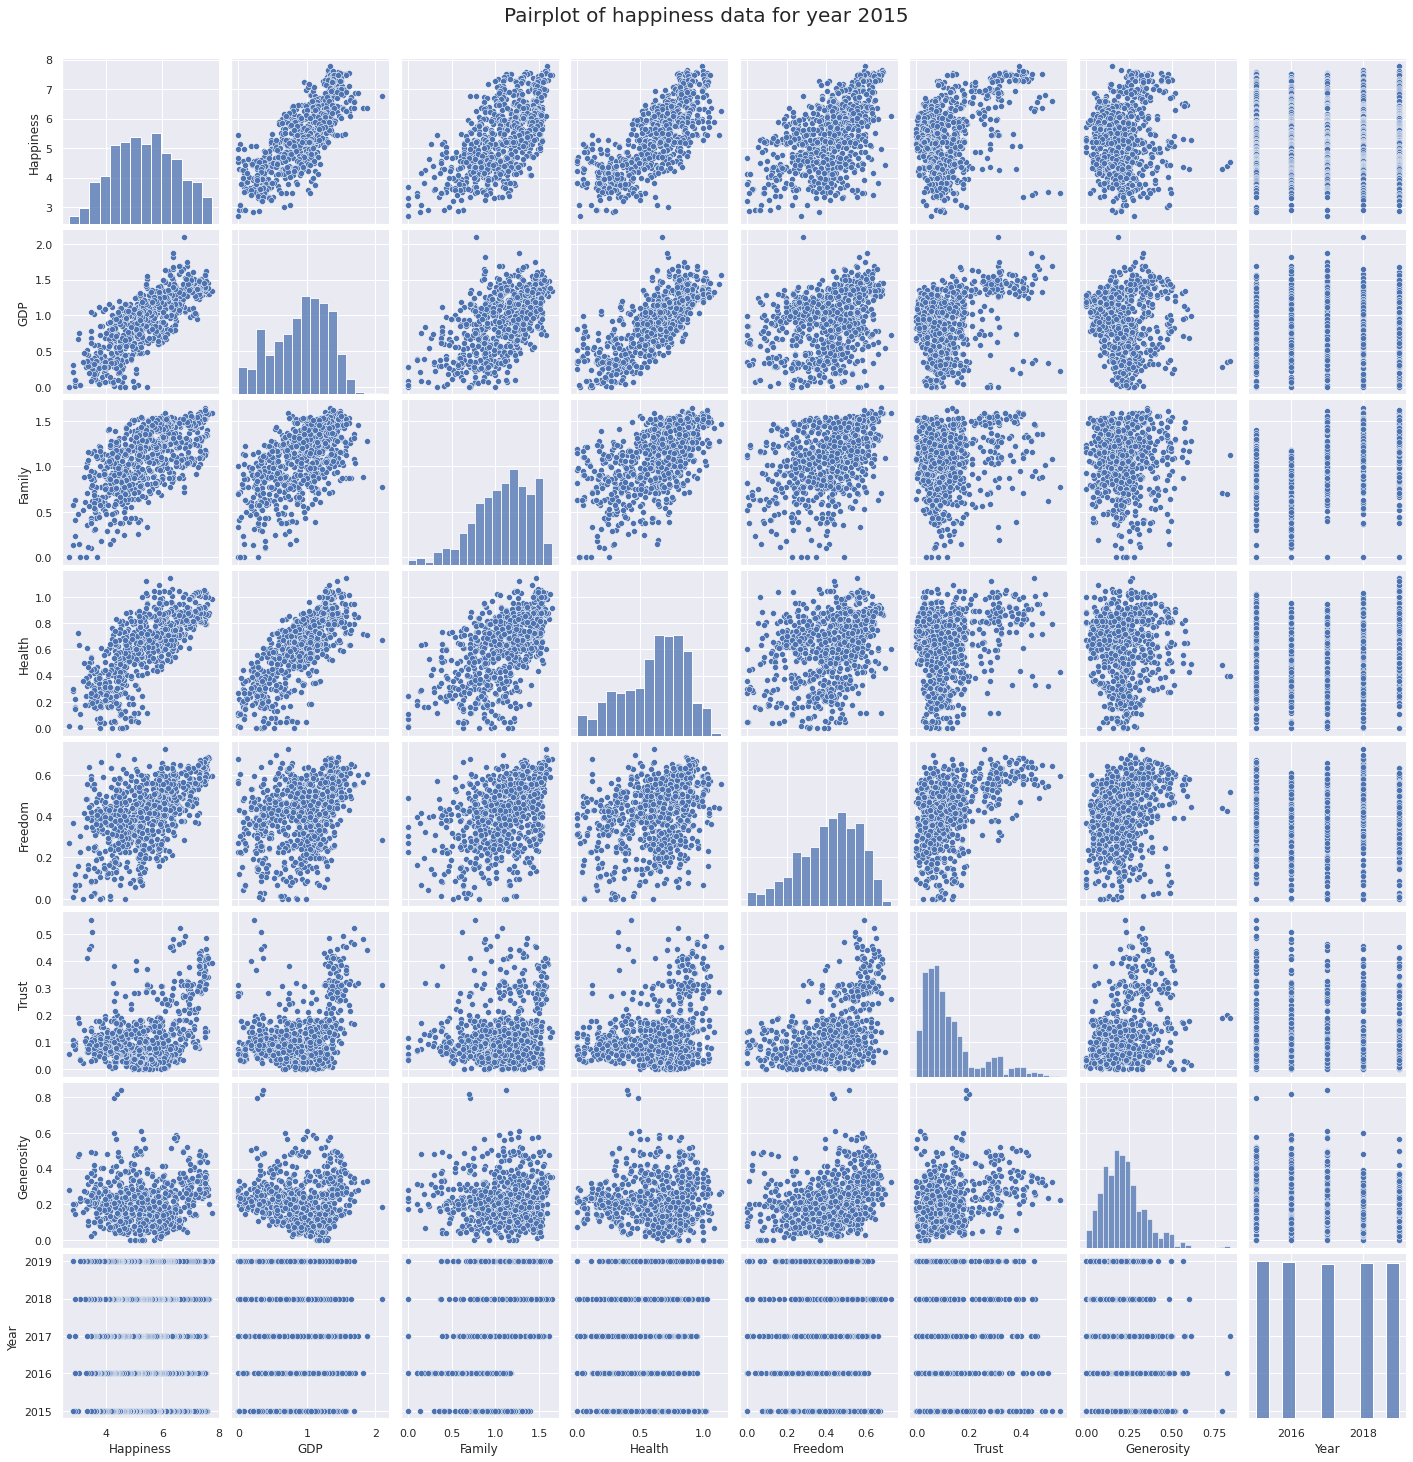

In [42]:
pp = sns.pairplot(data_happiness_concat)
pp.fig.suptitle("Pairplot of happiness data for year 2015", y = 1.02, fontsize = 20)

We can see that most variables have skewed distributions, and that there are some fairly apparent relationships between variables such as Health and GDP:

Text(0.5, 1.0, 'GDP vs Health in 2015')

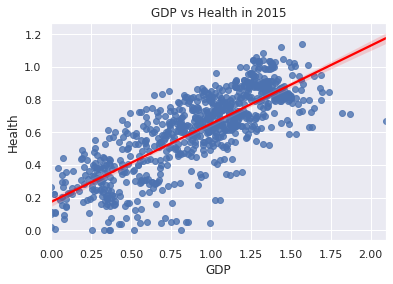

In [43]:
sp1 = sns.regplot(data = data_happiness_concat, x = "GDP", y = "Health", line_kws = {"color": "red"})
sp1.set_title("GDP vs Health in 2015")

### Univariate distributions

Let's look at how some variables' distributions evolved over time:

In [44]:
def create_boxplot_over_time(df, variable_name_year, variable_name_response):
    bp = sns.catplot(x = variable_name_year, y = variable_name_response, data = df, kind = "box")
    bp.ax.set_title("{} score distribution per year".format(variable_name_response))

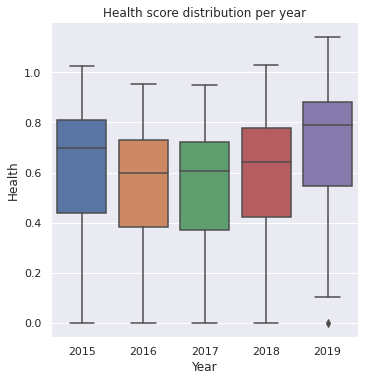

In [45]:
# Health
create_boxplot_over_time(data_happiness_concat, "Year", "Health")

It seems that there was initially a decrease, followed by an increase in mean health scores over time.

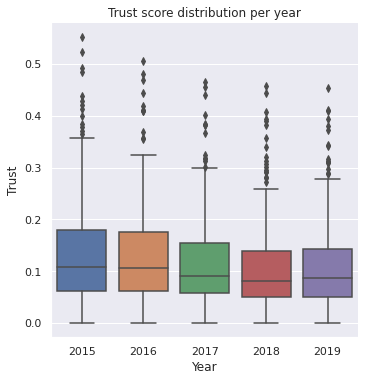

In [46]:
# Trust
create_boxplot_over_time(data_happiness_concat, "Year", "Trust")

Here, the story is quite different than for Health. Trust scores have seen a steady decline over time, reflecting decreasing institutional trust.

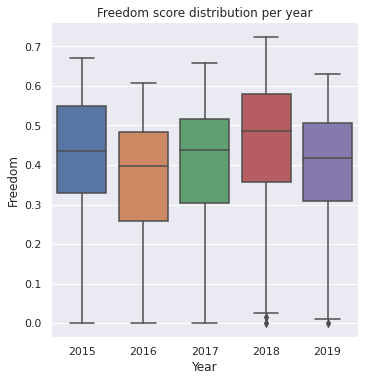

In [47]:
# Freedom
create_boxplot_over_time(data_happiness_concat, "Year", "Freedom")

Mean Freedom score values seem to oscillate over time - no clear trend.

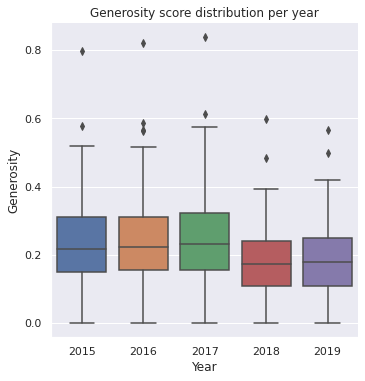

In [48]:
# Generosity
create_boxplot_over_time(data_happiness_concat, "Year", "Generosity")

Here, we can see a fairly sharp, persisting drop in Generosity scores since 2018, indicating that people are giving away less money as donations e.g. to charities.

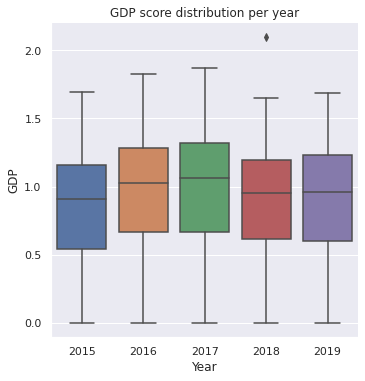

In [49]:
# GDP
create_boxplot_over_time(data_happiness_concat, "Year", "GDP")

The distribution of GDP scores seems fairly constant over time.

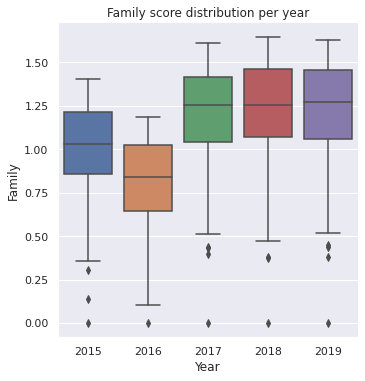

In [50]:
# Family
create_boxplot_over_time(data_happiness_concat, "Year", "Family")

For Family scores, there is a marked sharp drop in scores in 2016, followed by a large, persisting jump in 2017. We can only hypothesise what happened - perhaps data collection methods changed, or the question asked to participants was modified?

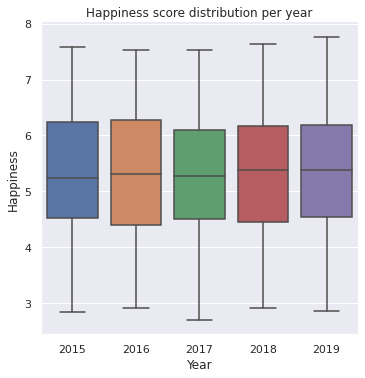

In [51]:
# Happiness
create_boxplot_over_time(data_happiness_concat, "Year", "Happiness")

Finally, the variable that scores happiness, seems to have fairly unchanged distribution over time.

### Bivariate distributions

Now that we have a fairly good idea of distribution shifts over time for individual variables, let's look at the relationships between pairs of variables, and how they changed:

In [52]:
from matplotlib import animation
# from IPython.display import HTML
%matplotlib inline

def get_data_for_year(df, year):
    # Exclude year since it's a categorical variable
    return df.loc[df["Year"] == year, df.columns != "Year"]

def create_pairwise_corrplot(df, year, fig, ax, data_title="happiness"):
    corr = get_data_for_year(df, year).corr()
    mask = np.triu(np.ones_like(corr, dtype = bool))
    cmap = sns.diverging_palette(230, 20,  as_cmap = True)
    corrplot = sns.heatmap(corr, mask = mask, cmap = cmap, center = 0, square = True, linewidths = 0.5, vmin = -1, vmax = 1)
    ax.set_title("Pairwise correlation plot for {} {} data".format(year, data_title))
    
def animate(i, data_title="happiness"):
    year_list = [2015, 2016, 2017, 2018, 2019]
    create_pairwise_corrplot(data_happiness_concat, year_list[i], fig, ax, data_title)

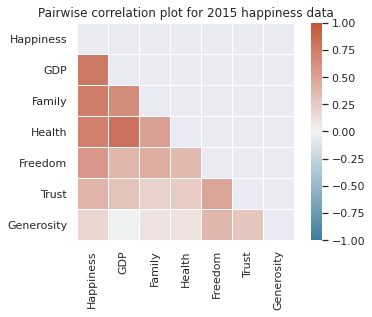

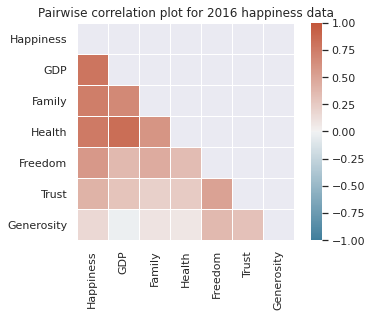

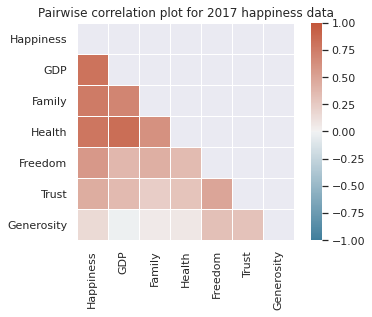

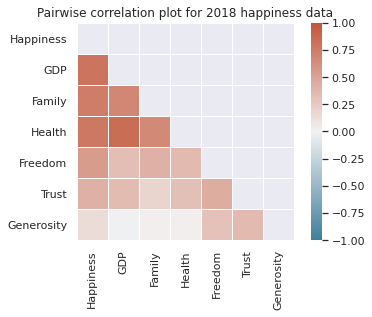

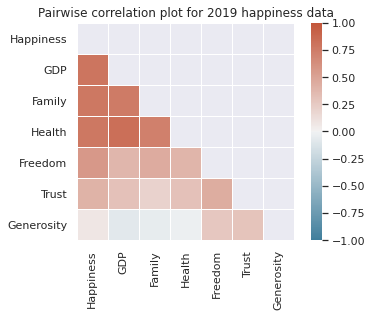

In [53]:
# fig, ax = plt.subplots()
# anim = animation.FuncAnimation(fig, animate, frames = len(data_happiness_concat["Year"].unique()))
# HTML(anim.to_html5_video())

for i in range(len(data_happiness_concat["Year"].unique())):
    fig, ax = plt.subplots(1, 1)
    animate(i, "happiness")

Most correlations stay the same. It's worth noting that variable most strongly positively correlated with Happiness are GDP, Family, and Health:

In [54]:
def create_scatterplot_kde_over_time(df, x, y, variable_name_year):
    scatter = sns.scatterplot(data = df, x = x, y = y, hue = variable_name_year, palette = "YlOrBr", s = 5)
    kde = sns.kdeplot(data = df, x = x, y = y, hue = variable_name_year, levels = 1, palette = "YlOrBr")
    scatter.set_title("{} vs {}".format(x, y))

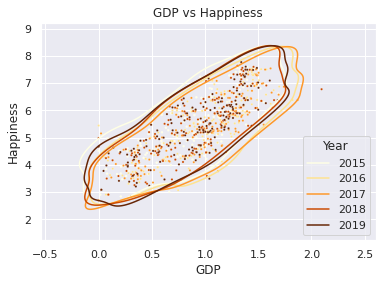

In [55]:
create_scatterplot_kde_over_time(data_happiness_concat, "GDP", "Happiness", "Year")

Although it's widely known "money won't make you happy" (at least beyond a certain threshold, which in the US is estimated at ~ $85,000), our data seems to suggest a fairly strong *correlation* nevertheless. We need to be careful in drawing any conclusions, as GDP by itself likely doesn't increase happiness. Instead it's more likely that higher GDP increases happiness indirectly - having higher disposable income can [buy people experiences](https://www.becomingminimalist.com/experiences/), or allow for [effective altriusm](https://www.effectivealtruism.org/articles/introduction-to-effective-altruism/) - both of which are proven to improve happiness.

This graph leads to 2 important conclusions: 

1. In general, correlation != causation
2. Having some domain knowledge helps understand relationships present in data.

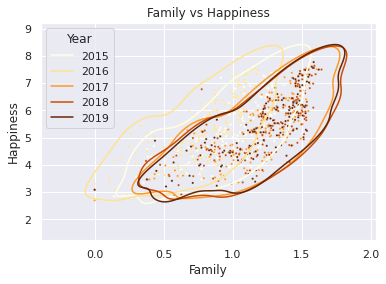

In [56]:
create_scatterplot_kde_over_time(data_happiness_concat, "Family", "Happiness", "Year")

Again, fairly strong positive correlation, with a shift towards higher family scores with time. Surprisingly, no corresponding increase in happiness scores, suggesting other factors contributed to its decline, balancing it out.

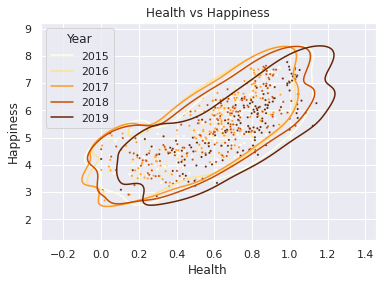

In [57]:
create_scatterplot_kde_over_time(data_happiness_concat, "Health", "Happiness", "Year")

This relationship is fairly self-explanatory and expected. High life expectancy is typically a result of caring about own health, and [healthy people are more happy, on average](https://www.healthline.com/nutrition/happiness-and-health#TOC_TITLE_HDR_2).

Interestingly, there are slight decreases in correlation between Generosity and GDP, Family, and Health. Let's investigate these further:

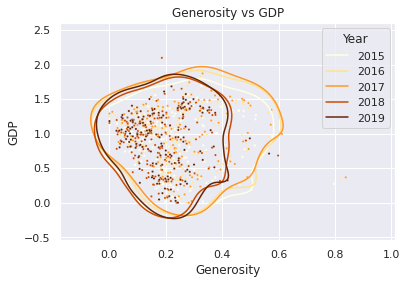

In [58]:
create_scatterplot_kde_over_time(data_happiness_concat, "Generosity", "GDP", "Year")

By creating a scatterplot with a Kernel Density Estimation plot overlaid on top, we can see the temporal shift in the bivariate distribution of Generosity and GDP. It seems that, over time, the distribution decreased its standard deviation, and shifted the mean to around (0.2, 1.0). How does this graph show that the correlation between Generosity and GDP decreased? The distribution is more "circular", which weakens the correlation - it would reach 0 if the distribution was perfectly circular. This graphic illustrates it well:

![](assets/correlation_bivariate.png)

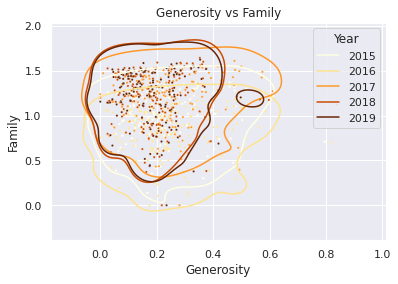

In [59]:
create_scatterplot_kde_over_time(data_happiness_concat, "Generosity", "Family", "Year")

In terms of Generosity vs Family, we see an even bigger shift towards a smaller standard deviation, as well as a shift of distribution's mean. Again, the indicator of weakened correlation are progressively more circular distributions.

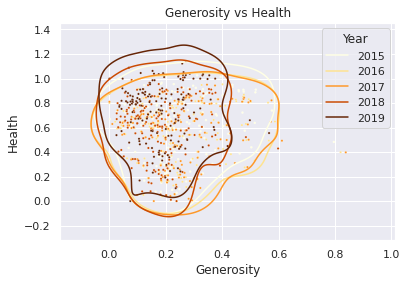

In [60]:
create_scatterplot_kde_over_time(data_happiness_concat, "Generosity", "Health", "Year")

As before, there is a decrease of standard deviation over time, as well as a shift towards the mean of around (0.2, 0.7). Once again, the distributions become more circular overtime, confirming the decreased correlation.

### Spatiality of happiness scores

#### Average happiness scores by region

After investigating the temporal aspect of happiness scores, let's look closer at their spatiality. We begin with a summary of average happiness scores on a per-region basis:

Text(0.5, 1.0, 'Average happiness scores by region across 2015 - 2019')

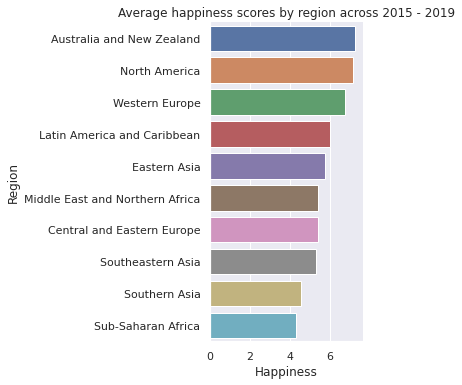

In [61]:
data_happiness_groupby_region_mean = data_happiness_concat.groupby("Region").mean().sort_values("Happiness", ascending = False).reset_index()
bp1 = sns.catplot(data = data_happiness_groupby_region_mean, y = "Region", x = "Happiness", kind = "bar")
bp1.ax.set_title("Average happiness scores by region across 2015 - 2019")

We can see that, overall, regions with lower-developed countries tend to have lower happiness scores. This agrees with our preivous finding that Happiness schores are strongly correlated with GDP. However, there are some regions which don't adhere to this trend strongly, such as Central and Eastern Europe. There is a marked difference between Happiness scores between Western and Central / Eastern Europe.

#### Change of happiness scores over time

We will now investigate how these scores changed over time for each region:

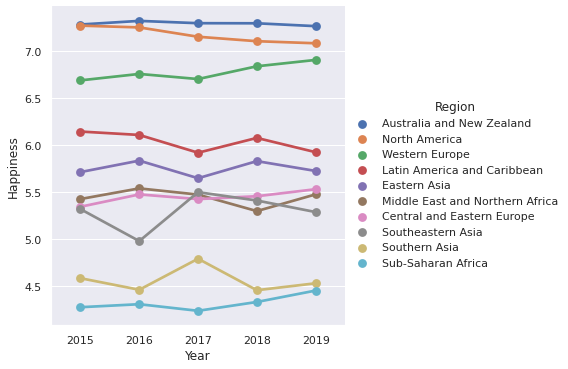

In [62]:
data_happiness_groupby_region_year_mean = data_happiness_concat.groupby(["Region", "Year"]).mean().sort_values("Happiness", ascending = False).reset_index()
sns.catplot(data = data_happiness_groupby_region_year_mean, x = "Year", y = "Happiness", hue = "Region", kind = "point")

Interestingly, there seem to be three fairly distinct groups of regions with similar happiness scores. The first group, including Australia, North America, and Western Europe, notes the highest Happiness scores. While these scores increased in some regions, they decreased in others.

The second group has many more regions, and the trends are similar - some happiness scores decreased, while others increased over time. Notable, there was a large drop in 2016 followed by a recovery in the scores for Southeastern Asia.

Finally, the last group is comprised of Southern Asia and Sub-Saharan Africa. Happiness scores also didn't change much, similarly to the other two groups.

While we're on the topic of happiness score variabilities, it might be interesting to look at the degrees of homogeneity of Happiness scores within each region:

Text(0.5, 1.0, 'Distribution of happiness scores per region across 2015 - 2019')

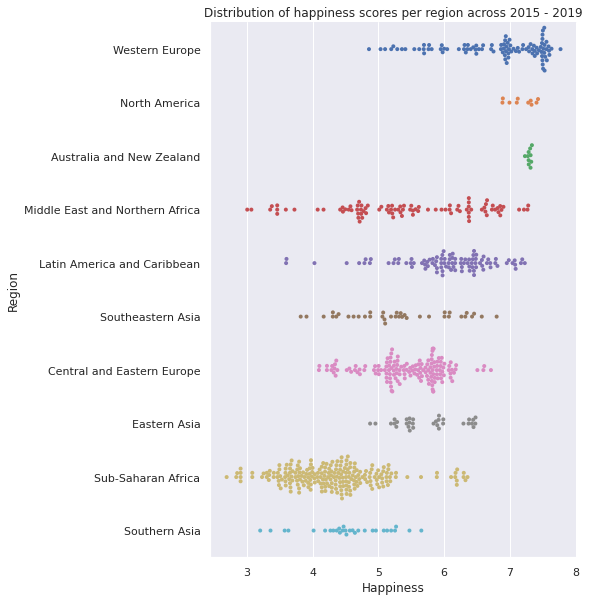

In [63]:
sp1 = sns.catplot(data = data_happiness_concat, y = "Region", x = "Happiness", kind = "swarm", height = 8, s = 4)
sp1.ax.set_title("Distribution of happiness scores per region across 2015 - 2019")

There are several observations to note:

1. Regions with fewer countries tend to have somewhat lower variability of happiness scores
2. Well-developed regions tend to have smaller variability of happiness scores compared to poorer regions

The observation from point 1. might be purely due to chance - we wouldn't have any specific reasons to believe that regions with fewer countries should be more homogenous in terms of happiness. However, the observation from point 2. might be due to the fact that, on average, well-developed regions like North America tend to provide a more "even" access to things that make people happier - healthcare systems, basic entertainment, infrastructure which allows to visit family members or see them virtually on a video chat, etc.

#### Variability of happiness scores

To formalize the notion of happiness score variability, and facilitate its temporal analysis, we can calculate the standard deviation of scores on a per-region basis:

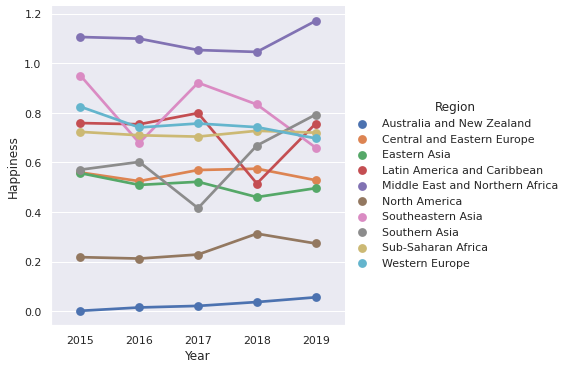

In [64]:
data_happiness_groupby_region_std = data_happiness_concat.groupby(["Region", "Year"]).std().reset_index()
sns.catplot(data = data_happiness_groupby_region_std, x = "Year", y = "Happiness", hue = "Region", kind = "point")

The evolution of standard deviation of happiness scores is pretty striking. While some regions, like the Middle East and Northern Africa, have consistently seen very high variability, other regions such as Australia and New Zealand have seen barely any!

Just via a visual inspection of the graph, we can again see an interesting relationship which we implicitly hypothesized about earlier, namely - that well-developed regions tend to have lower variability in happiness scores. Let's confirm this by looking at the relationship of the standard deviation of happiness scores vs mean GDP for each region:

[Text(0.5, 0, 'Mean happiness score'),
 Text(0, 0.5, 'Standard deviation of happiness scores')]

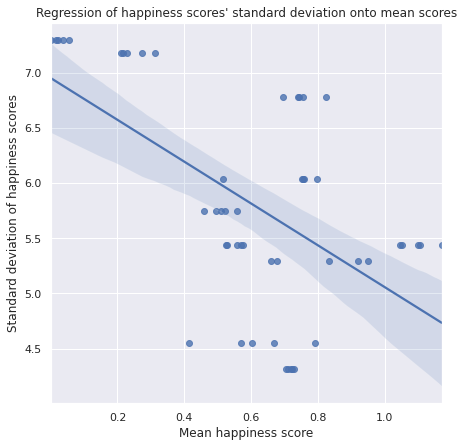

In [65]:
# Merge dataframes to have both the mean and std values for each region
data_std_region_happiness = data_happiness_groupby_region_std[["Region", "Happiness"]]
data_std_region_happiness = data_std_region_happiness.rename(columns = {"Happiness": "Happiness_mean"})
data_mean_region_happiness = data_happiness_groupby_region_mean[["Region", "Happiness"]]
data_mean_region_happiness = data_mean_region_happiness.rename(columns = {"Happiness": "Happiness_std"})
data_mean_std_merged = pd.merge(data_std_region_happiness, data_mean_region_happiness, how = "inner", on = "Region")
fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
rp1 = sns.regplot(data = data_mean_std_merged, x = "Happiness_mean", y = "Happiness_std", ax = ax)
rp1.set_title("Regression of happiness scores' standard deviation onto mean scores")
rp1.set(xlabel = "Mean happiness score", ylabel = "Standard deviation of happiness scores")

Of course, we have very little data in this case, so the regression like is at best a rough indication of a general trend discussed earlier. This model assumes that the underlying relationship is linear, which is most likely not true in this case. Having said that, the slope of the regression line tends to lend at least some support to our hypothesis - that more well-developed countries, which have higher mean happiness scores, have lower variability of these scores.

So far, we have only focused on the overall happiness scores, but it'll also be worth to look at how each factor contributes to that score on a per-region basis. Unfortunately, the sum of individual factor scores doesn't sum to the happiness score. We can still calculate % contribution of each factor compared to the sum of factor values:

[Text(0.5, 6.8000000000000185, '% of sum of factors'),
 Text(34.02353993055556, 0.5, 'Region')]

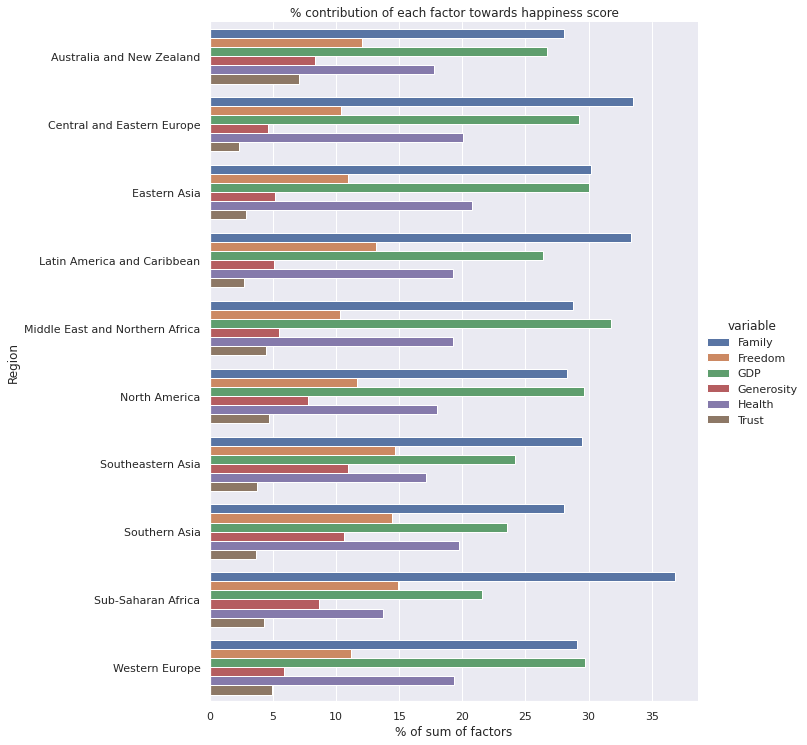

In [66]:
data_happiness_melt_factors = data_happiness_concat.drop(["Happiness", "Year", "Country"], axis=1).melt(id_vars=["Region"])
data_factor_agg_sum = data_happiness_melt_factors.groupby(["Region", "variable"]).agg({"value": "sum"})
data_factor_percentage_agg_region = data_factor_agg_sum.groupby(level = 0).apply(lambda x: x * 100 / float(x.sum())).reset_index()

bp2 = sns.catplot(data = data_factor_percentage_agg_region, x = "value", y = "Region", hue = "variable", kind = "bar", height = 10)
bp2.ax.set_title("% contribution of each factor towards happiness score")
bp2.ax.set(xlabel = "% of sum of factors", ylabel = "Region")

In [67]:
data_factor_percentage_agg_region_min = data_factor_percentage_agg_region
data_factor_percentage_agg_region_max = data_factor_percentage_agg_region["variable"].max()

def calculate_range_for_variable(df, variable_value, variable_column_name = "variable"):
    value_min = df[df[variable_column_name] == variable_value].min()
    value_max = df[df[variable_column_name] == variable_value].max()
    
    return value_max[2] - value_min[2]

variable_values_set = {"Family", "Freedom", "GDP", "Generosity", "Health", "Trust"}

print("Range of values for % contribution towards happiness score:")
for variable_value in variable_values_set:
    print("{}: {} %-points".format(variable_value, round(calculate_range_for_variable(data_factor_percentage_agg_region, variable_value), 2)))

print("\nStandard deviation of % contribution values for each factor:")
data_factor_percentage_agg_region.groupby("variable").std().reset_index()

Range of values for % contribution towards happiness score:
Trust: 4.77 %-points
Generosity: 6.27 %-points
Health: 7.02 %-points
Freedom: 4.55 %-points
Family: 8.77 %-points
GDP: 10.19 %-points

Standard deviation of % contribution values for each factor:


,variable,value
0,Family,2.984138
1,Freedom,1.786329
2,GDP,3.344855
3,Generosity,2.335433
4,Health,2.009339
5,Trust,1.369057


We can see that the biggest range and standard deviation of % contribution values is in GDP, while the range and standard deviation of % contributions values are the smallest for Freedom. This hints at the possibility of GDP being the factor that, out of the ones considered here, is the least consistent in making people happy. In other words, in some coutries money makes people happy to a larger degree than in other countries. This sonds plausible - in developed countries, it's more likely that a given individual will earn enough money to satisfy all basic needs that bring the most happiness. As discussed earlier, after a certain earnings threshold, money seems to have little to no influence on happiness.

This theory, however, seems to not be supported by the data. We can clearly see that the importance of GDP doesn't increase as the level of a given region's development deccreases. In other words - some poorer regions treat money as a less important factor contributing to their happiness than better-developed regions.

On the other hand, factors such as Freedom and Trust seems to have low variability in terms of % of contribution to each factor's sum, suggesting that there is a higher degree of agreement across the world about how important they are in terms of influencing happiness.

#### Biggest changes in happiness scores

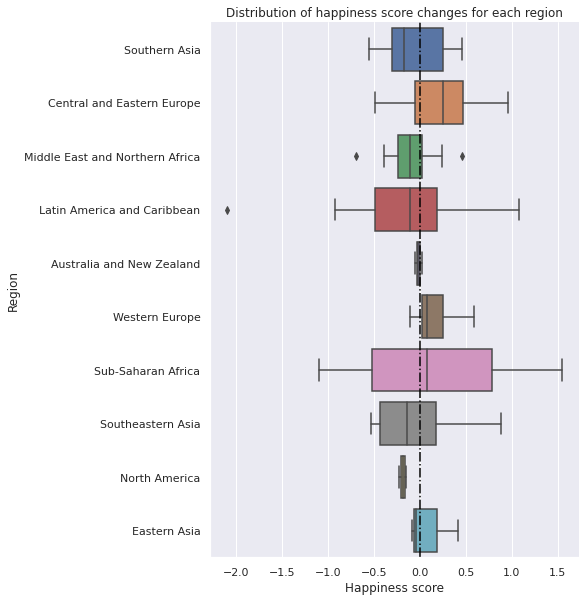

In [68]:
data_happiness_score_melt = data_happiness_concat.drop(["Year"], axis=1).melt(id_vars=["Country", "Region"])
data_happiness_score_melt = data_happiness_score_melt[data_happiness_score_melt["variable"] == "Happiness"]
data_happiness_2015_melt = data_happiness_concat[data_happiness_concat["Year"] == 2015].drop(["Year", "GDP", "Family", "Health", "Freedom", "Trust", "Generosity"], axis=1).melt(id_vars=["Country", "Region"])
data_happiness_2019_melt = data_happiness_concat[data_happiness_concat["Year"] == 2019].drop(["Year", "GDP", "Family", "Health", "Freedom", "Trust", "Generosity"], axis=1).melt(id_vars=["Country", "Region"])
data_happiness_2015_melt = data_happiness_2015_melt.set_index(["Country", "Region", "variable"])
data_happiness_2019_melt = data_happiness_2019_melt.set_index(["Country", "Region", "variable"])
data_happiness_2019_minus_2015 = data_happiness_2019_melt.subtract(data_happiness_2015_melt).reset_index().dropna()

bp3 = sns.catplot(data=data_happiness_2019_minus_2015, x = "value", y = "Region", kind = "box", height = 8)
bp3.ax.set_title("Distribution of happiness score changes for each region")
bp3.ax.set(xlabel = "Happiness score", ylabel = "Region")
plt.axvline(x=0, color="black", linestyle = "-.")

Once again we can see some interesting things:

1. There were regions which, collectively, got more happy, as well as ones which got less happy
2. Less well-developed regions tend to have a bigger variability in happiness score differences
    - However, there are exceptions such as the Middle East and Northern Africa
3. There seems to be some spatial autocorrelation - e.g. Western and Eastern Europe both have positive mean happiness score differences, while all Asian regions have negative mean differences

### Modelling happiness scores

Based on the above analysis and discovered relationships, a natural question arises: can we model happiness scores as a function of the available variables?

To begin with, let's start with a simple linear regression model. It has multiple benefits:
1. Allows us to do both predictive and inferential modelling
2. Is easily interpretable
3. Does not require large amounts of training data (which we don't have)

In [69]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.regression.linear_model import OLS
from math import floor
from sklearn.model_selection import train_test_split

def train_test_split_custom(df, test_size=0.25):
    n = df.shape[0]
    size_test = int(n * test_size)
    idx_test = np.random.choice(range(df.shape[0]), size=size_test, replace=False)
    idx_train = list(set(range(n)) - set(idx_test))
    df_test = df.iloc[idx_test]
    df_train = df.iloc[idx_train]
    
    return df_train, df_test

def k_fold_cv(df, y_col_name, k=10, is_lasso=True, alpha=0.5, seed=42):
    # Shuffle data
    df_shuffled = df.sample(frac=1, random_state=seed).reset_index()
    n = df_shuffled.shape[0]
    fold_size = floor(n / k)
    
    predictor_names = list(df.columns)
    predictor_names.remove(y_col_name)
    
    y_true_list = []
    y_pred_list = []
    mse_list = []
    params_list = []
    
    if is_lasso:
        L1_wt = 1
    else:
        L1_wt = 0
    
    for fold_idx in range(1, k+1):
        idx_start = (fold_idx - 1) * fold_size + 1
        idx_end = fold_idx * fold_size
        train_range = list(range(idx_start, idx_end+1))
        
        data_train = df_shuffled[df_shuffled.index.isin(train_range)]
        data_test = df_shuffled[~df_shuffled.index.isin(train_range)]
        
        X_train = np.matrix(data_train.drop(y_col_name, axis=1))
        X_test = np.matrix(data_test.drop(y_col_name, axis=1))
        y_train = np.array(data_train[y_col_name])
        y_test = np.array(data_test[y_col_name])
        
        model = OLS(y_train, X_train)
        model_fitted = model.fit()
        model_fitted_reg = model.fit_regularized(L1_wt=L1_wt, alpha=alpha, start_params=model_fitted.params)
        
        params = dict(zip(predictor_names, model_fitted_reg.params))
        
        y_pred = model_fitted_reg.predict(X_test)
        y_true_list.append(y_test)
        y_pred_list.append(y_pred)
        
        mse = np.mean((y_test - y_pred)**2)
        mse_list.append(mse)
        params_list.append(params)
    
    return mse_list, params_list

#### Unregularized multiple regression

In [93]:
SEED = 42
TEST_SIZE = 0.25

feature_names = ["GDP", "Family", "Health", "Freedom", "Trust", "Generosity"]
data = data_happiness_concat[["Happiness", "GDP", "Family", "Health", "Freedom", "Trust", "Generosity"]]
data_train, data_test = train_test_split_custom(data, TEST_SIZE)
reg = ols("Happiness ~ GDP + Family + Health + Freedom + Trust + Generosity", data=data_train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     339.6
Date:                Sat, 29 May 2021   Prob (F-statistic):          3.99e-186
Time:                        11:22:59   Log-Likelihood:                -462.88
No. Observations:                 587   AIC:                             939.8
Df Residuals:                     580   BIC:                             970.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1775      0.089     24.389      0.000       2.002       2.353
GDP            1.1727      0.092     12.771      0.000       0.992       1.353
Family         0.6311      0.090      6.984      0.000       0.454       0.809
Health         1.0316      0.148      6.974      0.000       0.741       1.322
Freedom        1.3187      0.187      7.068      0.000       0.952       1.685
Trust          0.7169      0.247      2.901      0.004       0.231       1.202
Generosity     0.8496      0.200      4.256      0.000       0.458       1.242
==============================================================================
Omnibus:                        8.625   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                9.427
Skew:                          -0.218   Prob(JB):                      0.00897
Kurtosis:                       3.442   Cond. No.                         23.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our multiple linear regression model does fairly okay, being able to explain ~77% of variability in happiness scores. All coefficients seem to have very small p-values, suggesting that they are significantly different from 0 (which would imply no relationship between a given coefficient and the response variable).

Out of all the coefficients, it seems that GDP has a very high influence on happiness score, something we discovered in our explaoratory data analysis. Surprisingly, however, Freedom turns out to have *the* highest influence on happiness scores.

In [128]:
def rmse(y_hat, y):
    return np.sqrt(np.mean((y_hat - y)**2))

In [129]:
rmse_reg = rmse(reg.predict(data_test), data_train["Happiness"])
print(round(rmse_reg, 4))

0.5772


Let's see if we can improve the model by transforming the predictor with the most non-linear relationship with Happiness - Trust. The relationship between these looks a bit like Hapiness = log(Trust):

<AxesSubplot:xlabel='Trust', ylabel='Happiness'>

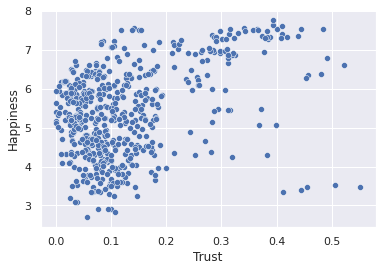

In [125]:
sns.scatterplot(x=(data_train["Trust"]), y=data_train["Happiness"])

Let's try applying exp(Trust) to see if RMSE improves:

In [126]:
reg_exp = ols("Happiness ~ GDP + Family + Health + Freedom + np.exp(Trust) + Generosity", data=data_train).fit()
reg_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     338.7
Date:                Sat, 29 May 2021   Prob (F-statistic):          7.41e-186
Time:                        11:35:24   Log-Likelihood:                -463.50
No. Observations:                 587   AIC:                             941.0
Df Residuals:                     580   BIC:                             971.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6520      0.211      7.812      0.000       1.237       2.067
GDP               1.1764      0.092     12.800      0.000       0.996       1.357
Family            0.6264      0.090      6.929      0.000       0.449       0.804
Health            1.0318      0.148      6.968      0.000       0.741       1.323
Freedom           1.3362      0.186      7.168      0.000       0.970       1.702
np.exp(Trust)     0.5330      0.199      2.676      0.008       0.142       0.924
Generosity        0.8589      0.200      4.298      0.000       0.466       1.251
==============================================================================
Omnibus:                        8.506   Durbin-Watson:                   1.534
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                9.270
Skew:                          -0.217   Prob(JB):                      0.00971
Kurtosis:                       3.437   Cond. No.                         29.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
rmse_reg_exp = rmse(reg_exp.predict(data_test), data_train["Happiness"])
print(round(rmse_reg_exp, 4))

0.578


While the p-value for the Trust coefficient fell significantly compared to the non-transformed version, the RMSE is only a little bit lower. All in all, it seems that this is a slightly superior model.

What do our regression coefficients mean? Let's take two examples: Health and np.exp(Trust):

- Health (1.0318) - this coefficient tells us that, holding all other predictors constant, increasing the value of this predictor by one unit leads to an increase in Happiness score by 1.0318 units.

- Family (0.6263) - for each 1-unit increase in Family score, there is a corresponding 0.62-unit increase in Hapiness score. It's important to note that this relationship is still _positive_, despite the coefficient being < 1. It simply means that the relationship is less pronounced. Only if the coefficient was < 0, the relationship would be negative.

#### Regularized regression

##### Ridge

Let's now fit a multiple linear regression model with variable selection, namely: ridge regression. I went with ridge because I expect all variables to have at least *some* influence on the happiness score, which fits the ridge assumption that no coefficients are == 0:

In [76]:
data = data_happiness_concat[["Happiness", "GDP", "Family", "Health", "Freedom", "Trust", "Generosity"]]
data = data.reset_index(drop=True)

X = np.matrix(data[["GDP", "Family", "Health", "Freedom", "Trust", "Generosity"]])
y = np.array(data["Happiness"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED)

IS_LASSO = False

#Ridge with mild regularization (alpha = 0.1)
mse_list, param_list = k_fold_cv(df=data, y_col_name="Happiness", k=10, is_lasso=IS_LASSO, alpha=0.1, seed=SEED)

best_mse = np.min(mse_list)
best_params = param_list[np.argmin(mse_list)]
print("best MSE: ", best_mse)
print("best params: ", best_params)

best MSE:  0.7557017961348407
best params:  {'GDP': 0.0011351234485528796, 'Family': 1.4014860150221962, 'Health': 1.8112771726037473, 'Freedom': 1.2700676610264563, 'Trust': 1.1807256380699207, 'Generosity': 0.4368528326596003}


We can see that the MSE we got using 10-fold cross-validation is ~ 0.75. Let's try picking an optimal amount of regularization by cross-validating the alpha parameter across a range of values:

In [77]:
from tqdm import tqdm

# We will average parameter values from each run of cross-validation, e.g. if there are 10 folds, we will average parameter values from these folds
def average_dict_key_values(dict_in_list):
    dict_out = {}
    
    # Initialize dict with key names and set their values to 0
    dict_out = {k: 0 for k in dict_in_list[0].keys()}
    
    for dict_in in dict_in_list:
        for key, value in dict_in.items():
            dict_out[key] += value
    
    return {k: v / len(dict_in_list) for k, v in dict_out.items()}


def cv_alpha(df, y_col_name, alpha_list, is_lasso):
    mse_list_mean = []
    param_list_mean = []
    
    for alpha_val in tqdm(alpha_list):
        mse_list, param_list = k_fold_cv(df=df, y_col_name=y_col_name, k=10, is_lasso=is_lasso, alpha=alpha_val)
        mse_list_mean.append(np.mean(mse_list))
        param_list_mean.append(average_dict_key_values(param_list))
        
    
    return dict(zip(alpha_list, mse_list_mean)), dict(zip(alpha_list, param_list_mean))

In [78]:
alpha_list = 10**np.linspace(-100, -1, 100)
alpha_to_mse_cv_dict, _ = cv_alpha(df=data, y_col_name="Happiness", alpha_list=alpha_list, is_lasso=IS_LASSO)
alpha_lowest_mse = min(alpha_to_mse_cv_dict, key=alpha_to_mse_cv_dict.get)
mse_lowest = alpha_to_mse_cv_dict[alpha_lowest_mse]

100%|██████████| 100/100 [00:04<00:00, 21.91it/s]


Lowest MSE for alpha = 0.01: 0.627


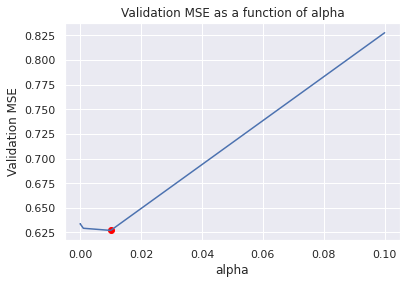

In [79]:
lp1 = sns.lineplot(x=list(alpha_to_mse_cv_dict.keys()), y=list(alpha_to_mse_cv_dict.values()))
plt.scatter(x=alpha_lowest_mse, y=mse_lowest, color="red")
plt.title("Validation MSE as a function of alpha")
plt.xlabel("alpha")
plt.ylabel("Validation MSE")
print("Lowest MSE for alpha = {}: {}".format(alpha_lowest_mse, round(mse_lowest, 3)))

We obtain the lowest validation MSE at alpha = 0.01, beyond which the MSE increases in a linear fashion. The lowest validation MSE is around 0.13 lower than the MSE for the unregularized model. Let's get the coefficients for the model with alpha = 0.01:

In [80]:
model = OLS(y_train, X_train)
model_fitted = model.fit()
# Ridge
model_fitted_reg = model.fit_regularized(L1_wt=(1 if IS_LASSO else 0), alpha=alpha_lowest_mse, start_params=model_fitted.params)
params = dict(zip(feature_names, model_fitted_reg.params))
df_coefs = pd.DataFrame.from_dict(params.items())
df_coefs.columns = ["variable_name", "coefficient_value"]
df_coefs

,variable_name,coefficient_value
0,GDP,1.110135
1,Family,1.903571
2,Health,1.373473
3,Freedom,2.022813
4,Trust,0.761936
5,Generosity,1.718897


If we compare the coefficients of our regularized ridge regression model to the coefficients of the unregularized one, we note several things:
1. Freedom is recognized by both models as the variable having the strongest effect on happiness score
2. While GDP is the variable with the 2nd strongest influence on happiness by the unregularized model (measured by coefficient value), it is also regarded as the 2nd least "influential" variable by the regularized model.

Perhaps we can get some insights into the relative "importance" (degree of influence) of each predictor by plotting coefficient values as a function of alpha? Let's see:

In [81]:
data = data_happiness_concat[["Happiness", "GDP", "Family", "Health", "Freedom", "Trust", "Generosity"]]
data = data.reset_index(drop=True)

X = np.matrix(data[["GDP", "Family", "Health", "Freedom", "Trust", "Generosity"]])
y = np.array(data["Happiness"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED)

# Ridge with mild regularization (alpha = 0.1)
mse_list, param_list = k_fold_cv(df=data, y_col_name="Happiness", k=10, is_lasso=IS_LASSO, alpha=0.5, seed=SEED)

best_mse = np.min(mse_list)
best_params = param_list[np.argmin(mse_list)]
print(average_dict_key_values(param_list))

{'GDP': 0.003991375470960662, 'Family': 1.2265927759529673, 'Health': 1.15826163046805, 'Freedom': 0.7731165688287568, 'Trust': 0.5759775398271861, 'Generosity': 0.21913083156803922}


In [82]:
# alpha_list = 10**np.linspace(-5, 1, 100)
# _, param_list_mean = cv_alpha(df=data, y_col_name="Happiness", alpha_list=alpha_list, is_lasso=IS_LASSO)

In [83]:
def plot_alpha_vs_coefficients(is_lasso, alpha_list, y_col_name):
    alpha_to_mse_cv_dict, param_list_mean = cv_alpha(df=data, y_col_name=y_col_name, alpha_list=alpha_list, is_lasso=is_lasso)
    df_alpha_to_mean_param_value = pd.DataFrame(columns=["alpha", "variable_name", "value"])

    # Create a dataframe in wide format for plotting with seaborn
    row_idx = 0
    for alpha, dict_mean_params in tqdm(param_list_mean.items()):
        variable_names = list(dict_mean_params.keys())
        variable_values = list(dict_mean_params.values())
        for (variable_name, variable_value) in zip(variable_names, variable_values):
            if variable_name == y_col_name:
                continue
            df_alpha_to_mean_param_value.loc[row_idx] = [alpha, variable_name, variable_value]
            row_idx += 1
    
    fig, ax = plt.subplots(figsize=(10, 6))
    lp2 = sns.lineplot(x="alpha", y="value", hue="variable_name", data=df_alpha_to_mean_param_value, ax=ax)
    lp2.set_title("Coefficient values as a function of log(alpha)")
    # Green line indicates best alpha value
    alpha_lowest_mse = min(alpha_to_mse_cv_dict, key=alpha_to_mse_cv_dict.get)
    plt.axvline(x=alpha_lowest_mse, color = "green", linestyle="--")
    lp2.set_xscale("log")
    lp2.set(xlabel="log(alpha)", ylabel= "coefficient value")

100%|██████████| 100/100 [00:02<00:00, 34.06it/s]


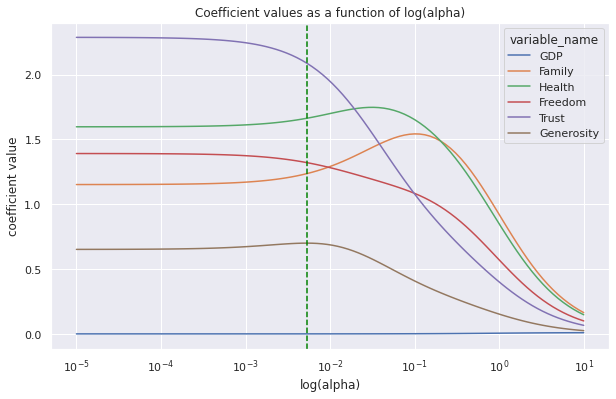

In [84]:
alpha_list = 10**np.linspace(-5, 1, 100)
plot_alpha_vs_coefficients(is_lasso=False, alpha_list=alpha_list, y_col_name="Happiness")

This chart looks pretty interesting! Note that some coefficient values decrease monotonically (e.g. Trust), while some increase and only then decrease (e.g. Health). This gives us a proxy for the degree of "importance" of each variable, as decided by the model. If we assess variable importance this way, we can conclude that Health and Family seem to be the most important in terms of affecting happiness scores, as their coefficient values are relatively large, and they initially increase.

##### Lasso

Let's see what happens to the coefficients if we use lasso regression:

100%|██████████| 100/100 [00:02<00:00, 36.39it/s]


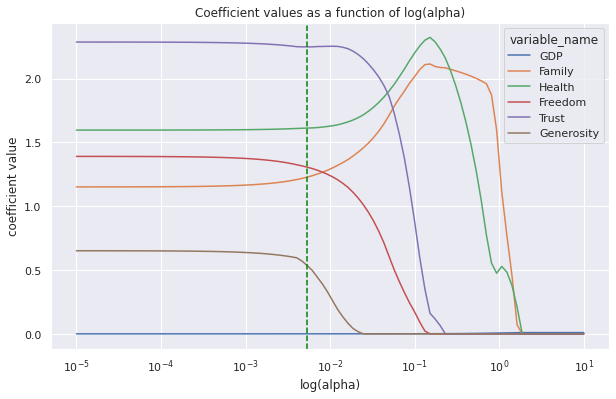

In [85]:
alpha_list = 10**np.linspace(-5, 1, 100)
plot_alpha_vs_coefficients(is_lasso=True, alpha_list=alpha_list, y_col_name="Happiness")

With lasso regression we can see that, eventually, all coefficients get shrunk to 0, as expected. In this case, we could treat the coefficients that got shrunken to 0 earlier as "less important", and ones that got shrunken later as "more important". In other words, we would assign a rank to each coefficient indicating when it's = 0, which would indicate the importance, with small values (e.g. rank 1) indicating small importance.

Using the above interpretation, we can rank the coefficients as follows (ordered by decreasing importance):

1. Health
2. Family
3. Trust
4. Freedom
5. Generosity
6. GDP

Clearly, our cross-validated lasso model indicates that Health is the most "important" variable in influencing happiness score, while GDP is the least important one.

### Summary

In the analysis of the 2015 - 2019 happiness data, we looked at both uivariate and bivariate distributions of variables influencing happiness scores. Some of the takeaways include:

1. While money does seem to contribute to overall happiness, the degree to which it does so is very inconcistent spatially
2. Money tends to be a rather poor predictor of happiness.
3. Factors that affect hapinness to a large degree, fairly consistently, include good health (Health), good relationships (Family), or instritutional trust (Trust)
4. Different factors such as Health or Family tend to change their importance over time. Their importance also varies spatially
5. Some regions (e.g. Europe) seem to be more happy, on average, than other regions (e.g. Asia)

## 2015 Happiness + suicide data

### A first look at the data

In [81]:
data_happiness_suicide.head(5)

,Country,Happiness,GDP,Family,Health,Freedom,Trust,Generosity,Region,Year,Suicides_no,Population,Suicides_per_100k
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Western Europe,2015,1073.0,7892502.0,13.721667
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,Western Europe,2015,40.0,308554.0,11.720833
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Western Europe,2015,564.0,5383060.0,10.118333
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,Western Europe,2015,590.0,4882909.0,11.369167
5,Finland,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,Western Europe,2015,731.0,5181797.0,13.432500


In [82]:
data_happiness_suicide.describe()

,Happiness,GDP,Family,Health,Freedom,Trust,Generosity,Year,Suicides_no,Population,Suicides_per_100k
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.0,53.000000,5.300000e+01,53.000000
mean,6.218264,1.132585,1.157052,0.807952,0.480777,0.172053,0.240484,2015.0,3074.037736,2.969755e+07,11.144072
std,0.921575,0.237022,0.184932,0.127157,0.148750,0.148547,0.134501,0.0,6897.861698,5.252175e+07,6.515303
min,4.297000,0.474280,0.385620,0.276880,0.076990,0.006490,0.000000,2015.0,34.000000,3.085540e+05,1.083333
25%,5.548000,1.007610,1.078600,0.731720,0.406720,0.042320,0.128000,2015.0,342.000000,3.583382e+06,6.454167
50%,6.329000,1.147230,1.219630,0.811600,0.516490,0.135860,0.232400,2015.0,1062.000000,9.114524e+06,10.577500
75%,6.946000,1.302320,1.280170,0.892840,0.603650,0.245580,0.330880,2015.0,2872.000000,3.969962e+07,14.617500
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.522080,0.576300,2015.0,44189.000000,3.000785e+08,32.123333


The most striking observation of the above data summary is the range in suicide rates. The minimum value (1.08) is ~30x lower than the maximum value (32.12)!

Text(0.5, 1.02, 'Pairplot of happiness + suicide data for year 2015')

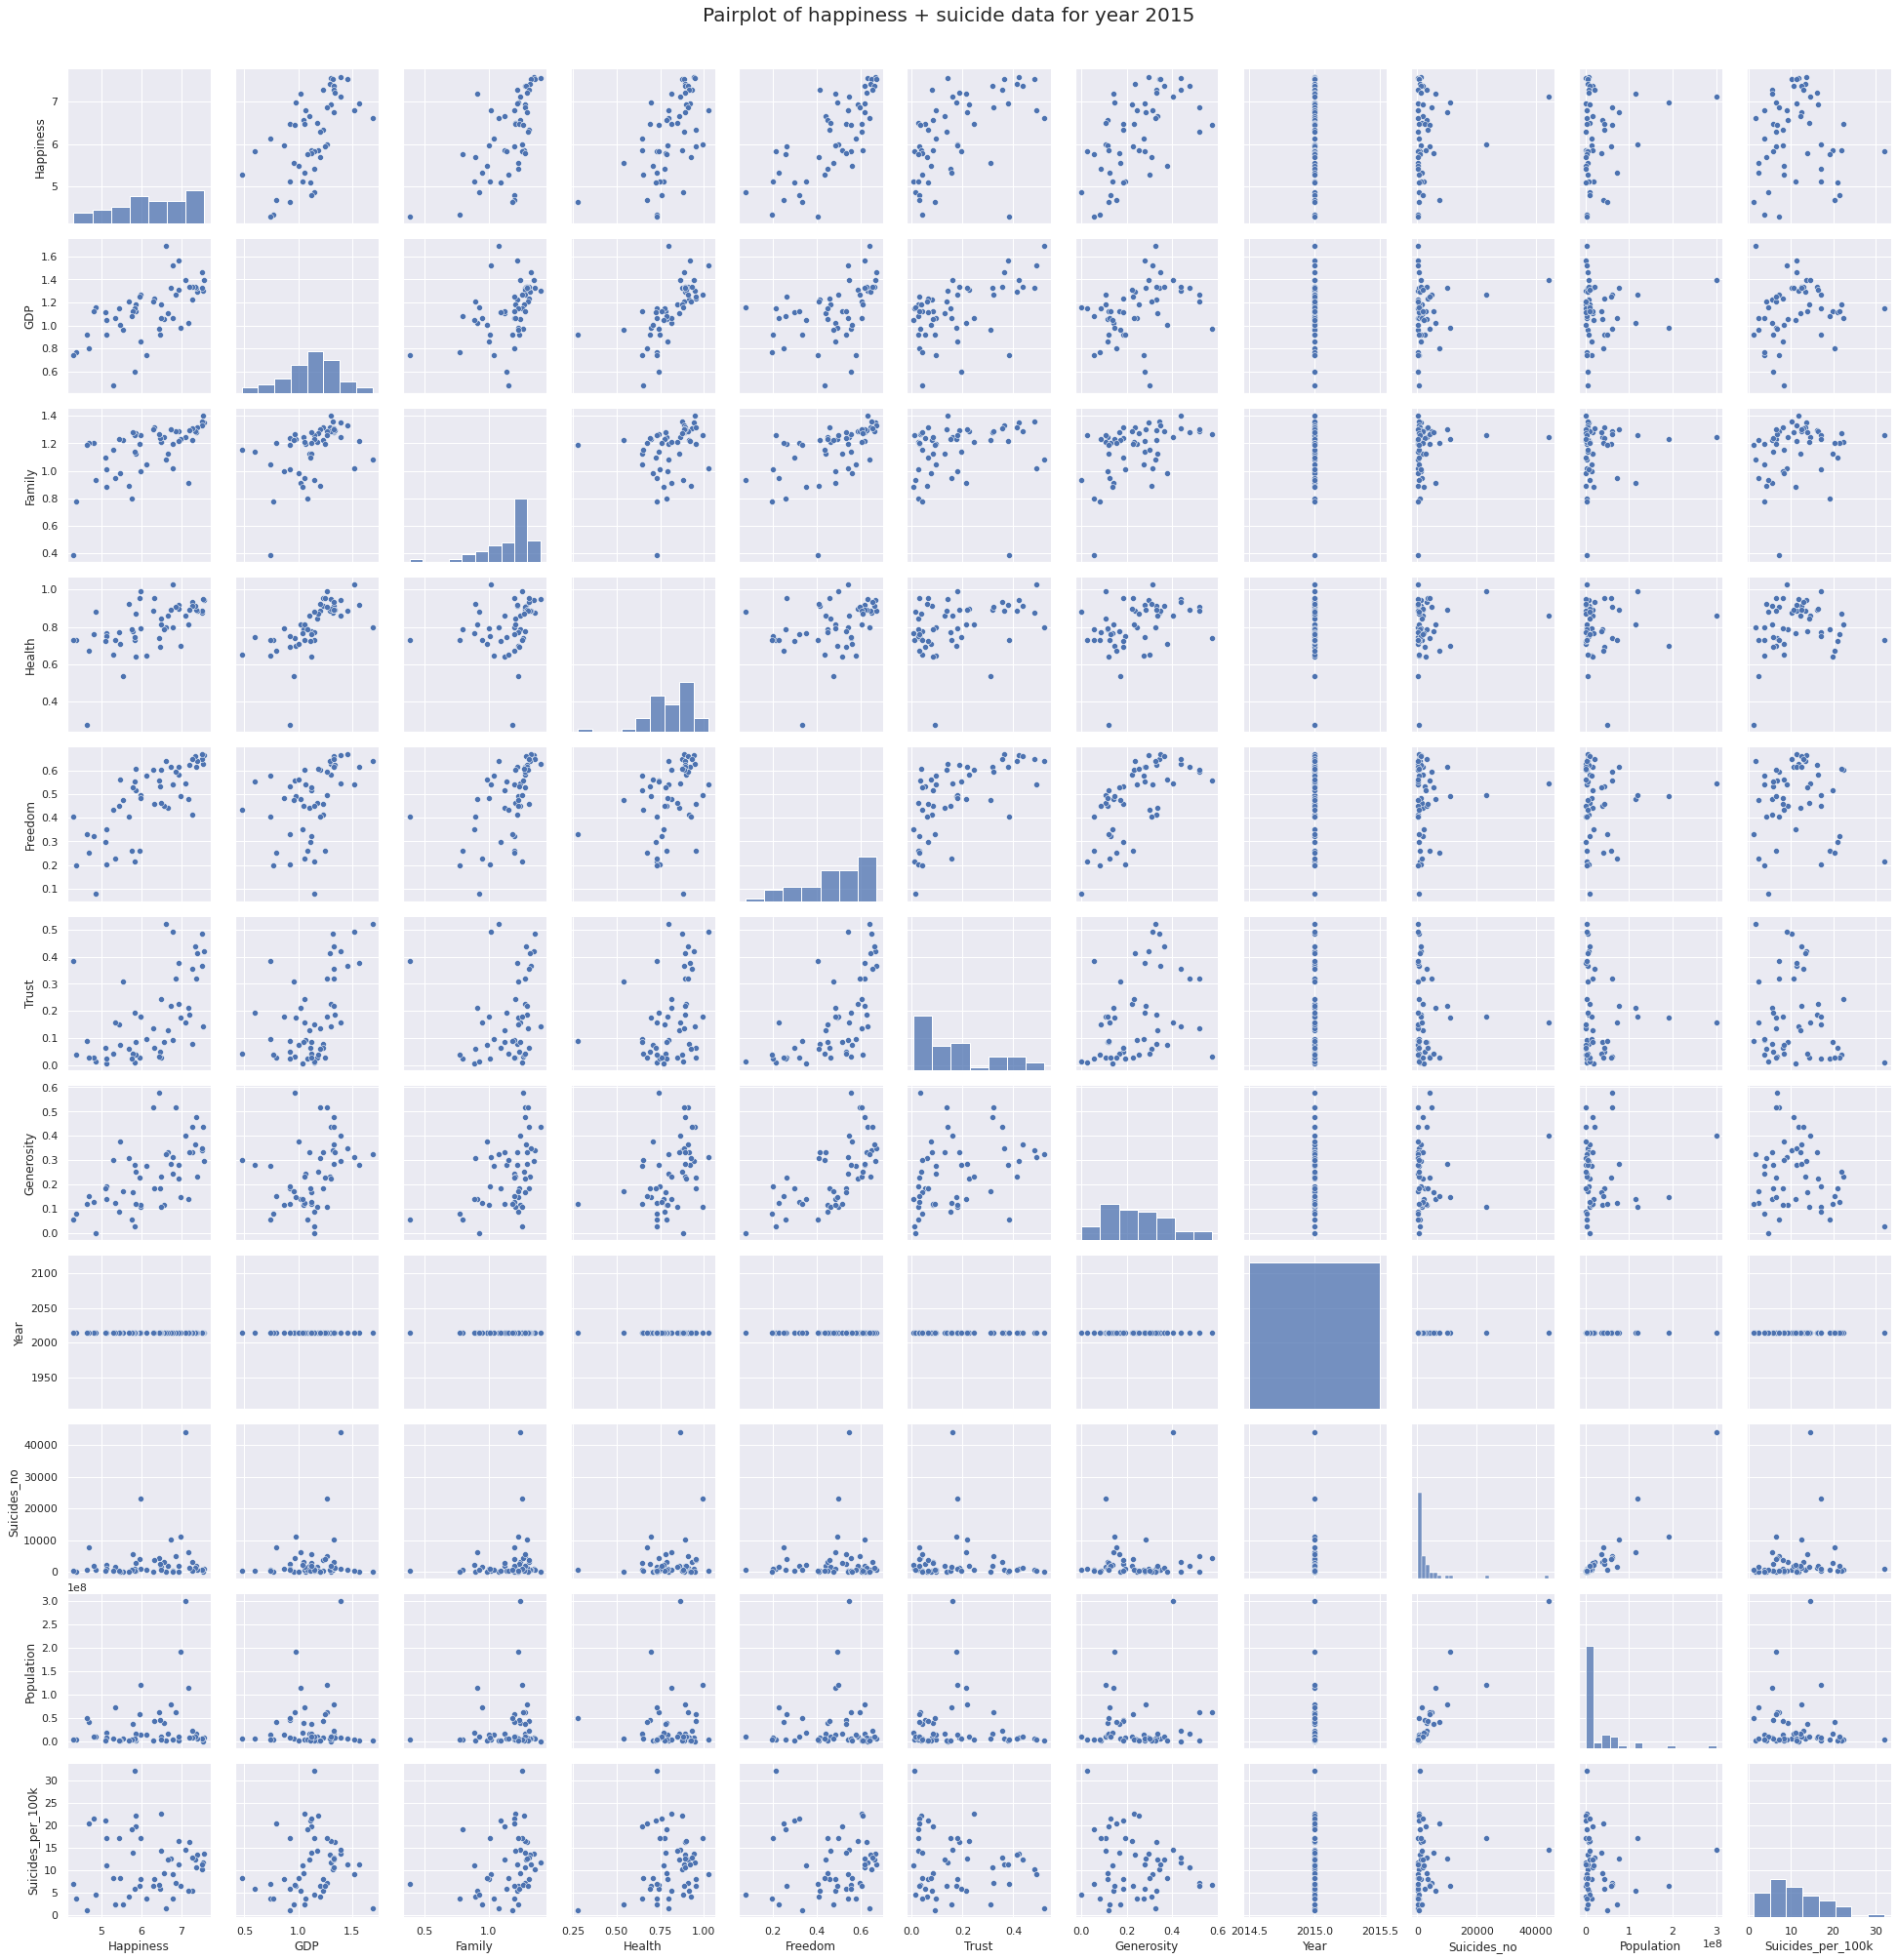

In [83]:
pp2 = sns.pairplot(data_happiness_suicide)
pp2.fig.suptitle("Pairplot of happiness + suicide data for year 2015", y = 1.02, fontsize = 20)

From the pairplot, we can see that there might be some relationships present between the suicide rates and some variables contributing to happiness scores.

### Univariate distributions

[Text(0.5, 0, 'Number of suicides'), Text(0, 0.5, 'Count')]

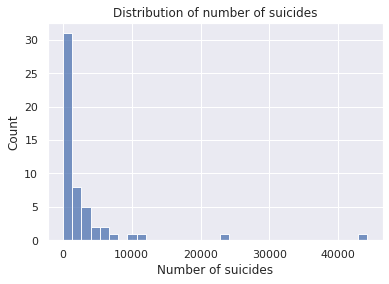

In [84]:
hp1 = sns.histplot(x="Suicides_no", data=data_happiness_suicide)
hp1.set_title("Distribution of number of suicides")
hp1.set(xlabel="Number of suicides", ylabel="Count")

[Text(0.5, 0, 'Number of suicides')]

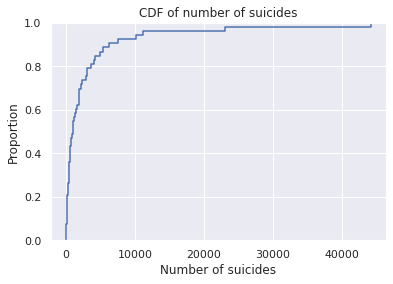

In [85]:
cdfp1 = sns.ecdfplot(x="Suicides_no", data=data_happiness_suicide)
cdfp1.set_title("CDF of number of suicides")
cdfp1.set(xlabel="Number of suicides")

The distribution of the number of suicides is very right (positively) skewed. Over 90% of countries saw < 10000 suicides in 2015.

[Text(0.5, 0, 'Suicides / 100k')]

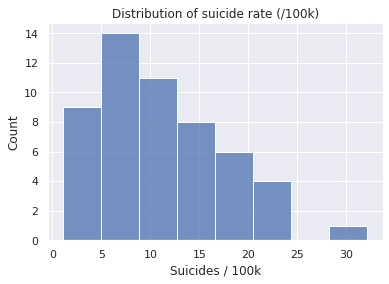

In [86]:
hp2 = sns.histplot(x="Suicides_per_100k", data=data_happiness_suicide)
hp2.set_title("Distribution of suicide rate (/100k)")
hp2.set(xlabel="Suicides / 100k")

Here, we can see a much lessright-skewed distribution.

### Bivariate distributions

Let's now investigate joint distributions of suicide rates and "happiness variables":

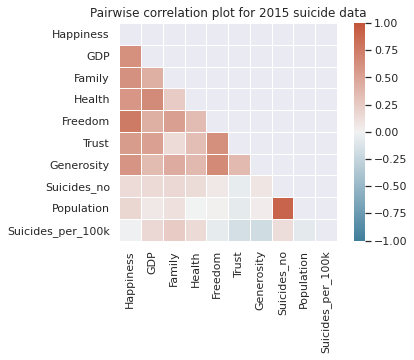

In [87]:
fig, ax = plt.subplots(1, 1)
create_pairwise_corrplot(data_happiness_suicide, 2015, fig, ax, "suicide")

Compared to correlations between happiness variables, the correlations for suicide-related variables are much weaker. The strongest correlations are between suicide rate and Family, Trust, and Generosity.

In [88]:
def create_scatterplot_kde(df, x, y):
    scatter = sns.scatterplot(data = df, x = x, y = y)
    kde = sns.kdeplot(data = df, x = x, y = y)
    scatter.set_title("{} vs {}".format(x, y))

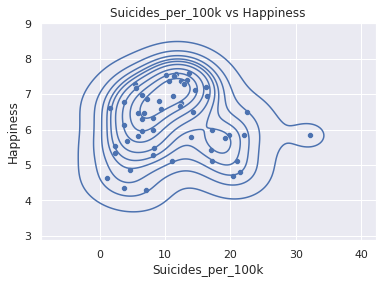

In [89]:
create_scatterplot_kde(data_happiness_suicide, "Suicides_per_100k", "Happiness")

The distribution is fairly "round", indicating a weak, if any, relationship between suicide rate and happiness scores.

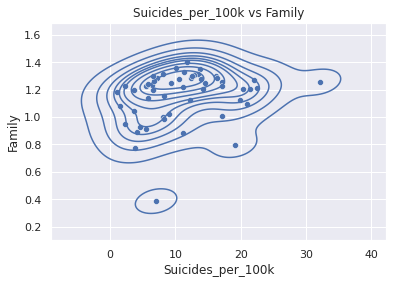

In [90]:
create_scatterplot_kde(data_happiness_suicide, "Suicides_per_100k", "Family")

The above plot shows that as suicide rates increase, so do Family scores. We also spot an outlier. The relationship is fairly weak.

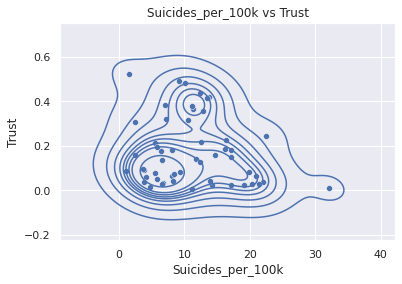

In [91]:
create_scatterplot_kde(data_happiness_suicide, "Suicides_per_100k", "Trust")

Here, the relationship between suicide rate and Trust scores is negative - as suicide rates increase, trust decreases.

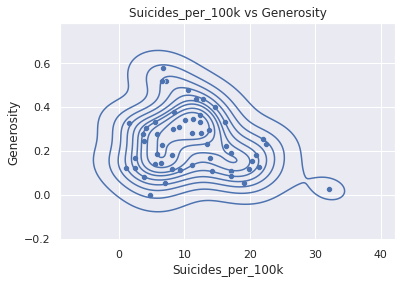

In [92]:
create_scatterplot_kde(data_happiness_suicide, "Suicides_per_100k", "Generosity")

Once again, the relationship between suicide rate and Generosity scores is negative. It seems a bit stronger than the previous ones, but is still weak-to-moderate.

All in all, there doesn't seem to be much correlation between suicide rates and Happiness scores, or any happiness-related variables.

### Spatiality of suicide rates

Let's further investigate if there are some regions that have significantly higher or lower suicide rates.

[Text(0.5, 6.800000000000004, 'Suicides / 100k')]

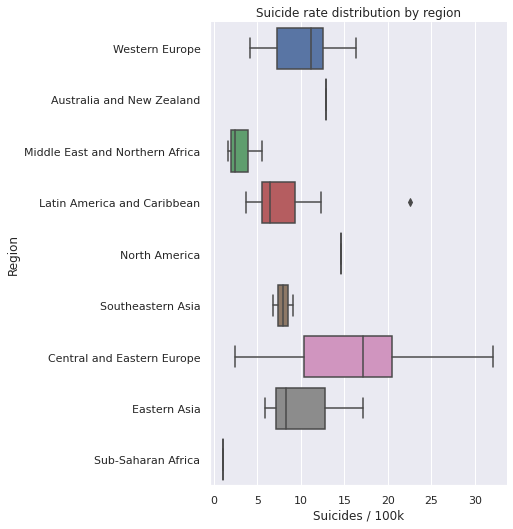

In [93]:
bp4 = sns.catplot(data=data_happiness_suicide, x="Suicides_per_100k", y="Region", kind="box", height=7)
bp4.ax.set_title("Suicide rate distribution by region")
bp4.ax.set(xlabel="Suicides / 100k")

Interestingly, there is a very wide variation in the distributions of suicide rates:

1. Mean suicide rates vary from as low as ~ 0 in Sub-Saharan Africa to ~17.5 in Central and Eastern Europe
    - This could be caused by genuinely lower suicide rates in Sub-Saharan Africa, or by underreporting of suicides. Without access to data collection methods, it's impossible to conclude anything.
2. There seems to be some spatial autocorrelation at play once again. Regions closer to each other, such as Western Europe and Central and Eastern Europe tend to have more similar distributions than more distant regions. Another example is Southeastern Asia and Eastern Asia, which have almost equal means.
3. There is a very clear outlier in Latin America and Caribbean

In [94]:
data_happiness_suicide[data_happiness_suicide["Region"] == "Latin America and Caribbean"].max()

Country                                  Uruguay
Happiness                                  7.187
GDP                                      1.10715
Family                                   1.24823
Health                                   0.85857
Freedom                                  0.60362
Trust                                    0.24558
Generosity                               0.33363
Region               Latin America and Caribbean
Year                                        2015
Suicides_no                              11163.0
Population                           191087085.0
Suicides_per_100k                      22.501667
dtype: object

Uruguay is the country with unusually high suicide rates in its region.

#### Central and Eastern Europe

Let's look a bit closer at Central and Eastern Europe's wide variability in suicide rates.

In [95]:
pd.options.mode.chained_assignment = None
data_happiness_suicide_europe_eastern_central = data_happiness_suicide[data_happiness_suicide["Region"] == "Central and Eastern Europe"]
data_happiness_suicide_europe_eastern_central["suicide_rate_above_mean"] = data_happiness_suicide_europe_eastern_central["Suicides_per_100k"] >= data_happiness_suicide_europe_eastern_central["Suicides_per_100k"].mean()

Text(0.5, 1.0, 'Happiness')

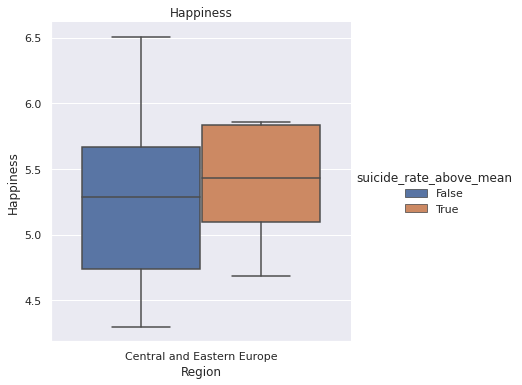

In [96]:
bp5 = sns.catplot(data=data_happiness_suicide_europe_eastern_central, x="Region", y="Happiness", hue = "suicide_rate_above_mean", kind="box")
bp5.ax.set_title("Happiness")

Happiness scores tend to have a much wider range of values, as well as a slightly _lower_ mean for countries where suicide rates are below mean rate. This is a somewhat counterintuitive result, as we would expect Happiness scores to be higher, on average, for countries with lower suicide rates. The difference in mean values is fairly small, however.

In [97]:
data_happiness_suicide_europe_eastern_central.min()

Country                                       Armenia
Happiness                                       4.297
GDP                                           0.47428
Family                                        0.38562
Health                                        0.53886
Freedom                                       0.19847
Trust                                         0.00649
Generosity                                    0.02641
Region                     Central and Eastern Europe
Year                                             2015
Suicides_no                                      74.0
Population                                  1243450.0
Suicides_per_100k                            2.373333
suicide_rate_above_mean                         False
dtype: object

In [98]:
data_happiness_suicide_europe_eastern_central.max()

Country                                       Ukraine
Happiness                                       6.505
GDP                                           1.18498
Family                                        1.27948
Health                                        0.87337
Freedom                                       0.60855
Trust                                         0.38331
Generosity                                     0.3003
Region                     Central and Eastern Europe
Year                                             2015
Suicides_no                                    7574.0
Population                                 40345446.0
Suicides_per_100k                           32.123333
suicide_rate_above_mean                          True
dtype: object

The above countries are from two ends of the suicide rate distribution. Armenia has a staggeringly 13x lower suicide rate than Ukraine, while also having lower mean Happiness score! Without more detailed data about each countries, as well as more in-depth knowledge about the socioeconomic factors, we can only speculate as to the reasons behind this: be it underreporting of suicides, religious factors, or varying degrees of cultural acceptance of suicide.

### Modelling suicide rates

#### Unregularized multiple regression

We will now investigate what the models tell us above the relative importance of happiness-related variables in predicting suicide rates.

In [99]:
SEED = 42
TEST_SIZE = 0.25

feature_names_suicide = ["Happiness", "GDP", "Family", "Health", "Freedom", "Trust", "Generosity"]
data = data_happiness_suicide[["Suicides_per_100k", "Happiness", "GDP", "Family", "Health", "Freedom", "Trust", "Generosity"]]
data_train, data_test = train_test_split_custom(data, TEST_SIZE)
reg = ols("Suicides_per_100k ~ Happiness + GDP + Family + Health + Freedom + Trust + Generosity", data=data_train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Suicides_per_100k   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     1.362
Date:                Wed, 12 May 2021   Prob (F-statistic):              0.255
Time:                        19:03:23   Log-Likelihood:                -124.36
No. Observations:                  40   AIC:                             264.7
Df Residuals:                      32   BIC:                             278.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.1257     10.218     -1.187      0.244     -32.940       8.688
Happiness      1.4291      2.592      0.551      0.585      -3.851       6.709
GDP            6.6115      6.826      0.969      0.340      -7.293      20.516
Family         5.0715      9.817      0.517      0.609     -14.925      25.068
Health         5.1331     10.728      0.478      0.636     -16.718      26.984
Freedom        6.0501     13.423      0.451      0.655     -21.291      33.391
Trust        -11.2175     10.548     -1.064      0.296     -32.702      10.267
Generosity   -18.7641      9.608     -1.953      0.060     -38.336       0.808
==============================================================================
Omnibus:                        9.217   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                8.286
Skew:                           0.923   Prob(JB):                       0.0159
Kurtosis:                       4.249   Cond. No.                         110.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model indicates that all coefficients' values are not significantly different from 0 - we fail to reject the null hypothesis that they are == 0. This means that, according to the model, no variables have significant correlation with suicide rates.

#### Regularized regression

We will now fit regularized lasso and ridge models to see how quickly different coefficient values are shrunk. Before doing so, we need to see what values of parameter alpha yeild best results in terms of validation MSE.

##### Ridge

In [100]:
IS_LASSO = False

alpha_list = 10**np.linspace(-100, 1, 1000)
alpha_to_mse_cv_dict, param_list_mean = cv_alpha(df=data, y_col_name="Suicides_per_100k", alpha_list=alpha_list, is_lasso=IS_LASSO)
alpha_lowest_mse = min(alpha_to_mse_cv_dict, key=alpha_to_mse_cv_dict.get)
mse_lowest = alpha_to_mse_cv_dict[alpha_lowest_mse]

100%|██████████| 1000/1000 [00:43<00:00, 23.08it/s]


Lowest MSE for alpha = 0.9749649183484176: 85.162


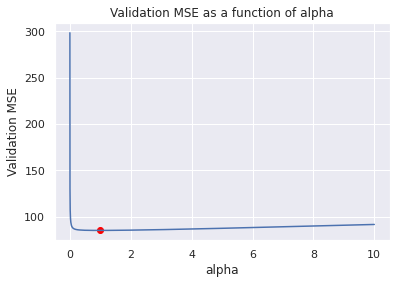

In [101]:
lp1 = sns.lineplot(x=list(alpha_to_mse_cv_dict.keys()), y=list(alpha_to_mse_cv_dict.values()))
plt.scatter(x=alpha_lowest_mse, y=mse_lowest, color="red")
plt.title("Validation MSE as a function of alpha")
plt.xlabel("alpha")
plt.ylabel("Validation MSE")
print("Lowest MSE for alpha = {}: {}".format(alpha_lowest_mse, round(mse_lowest, 3)))

We obtain the lowest validation MSE at alpha ~= 0.975, beyond which the MSE increases monotonically. Let's get the coefficients for the best model:

In [102]:
data = data_happiness_suicide[["Suicides_per_100k", "Happiness", "GDP", "Family", "Health", "Freedom", "Trust", "Generosity"]]
data = data.reset_index(drop=True)

X = np.matrix(data[["Health", "GDP", "Family", "Health", "Freedom", "Trust", "Generosity"]])
y = np.array(data["Suicides_per_100k"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED)

IS_LASSO = False

#Ridge with mild regularization (alpha = 0.1)
mse_list, param_list = k_fold_cv(df=data, y_col_name="Suicides_per_100k", k=10, is_lasso=IS_LASSO, alpha=alpha_lowest_mse, seed=SEED)

best_mse = np.min(mse_list)
best_params = param_list[np.argmin(mse_list)]
print("best MSE: ", best_mse)
print("best params: ", best_params)

best MSE:  41.97509283903308
best params:  {'Happiness': 0.0830634174071037, 'GDP': 1.2235817388557328, 'Family': 0.355195591299412, 'Health': 0.06636282546814885, 'Freedom': 0.6765408309873714, 'Trust': -0.0016135710331761782, 'Generosity': -0.25379195150758005}


In [103]:
model = OLS(y_train, X_train)
model_fitted = model.fit()
# Ridge
model_fitted_reg = model.fit_regularized(L1_wt=(1 if IS_LASSO else 0), alpha=alpha_lowest_mse, start_params=model_fitted.params)
params = dict(zip(feature_names, model_fitted_reg.params))
df_coefs = pd.DataFrame.from_dict(params.items())
df_coefs.columns = ["variable_name", "coefficient_value"]
df_coefs

,variable_name,coefficient_value
0,GDP,1.843706
1,Family,2.534032
2,Health,2.821371
3,Freedom,1.843706
4,Trust,0.786679
5,Generosity,0.018360


100%|██████████| 100/100 [00:02<00:00, 33.49it/s]


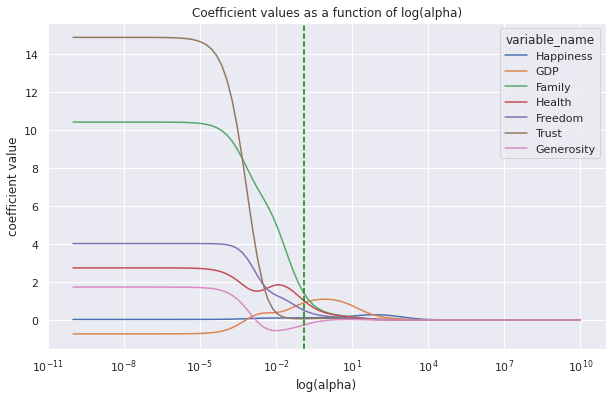

In [104]:
alpha_list = 10**np.linspace(-10, 10, 100)
plot_alpha_vs_coefficients(is_lasso=IS_LASSO, alpha_list=alpha_list, y_col_name="Suicides_per_100k")

While there seems to be some variation in when different coefficient values are shrunk to ~0, there isn't as much variation as when we predicted happiness scores. This suggests that there is no variable that's much more useful in predicting suicide rates than any other ones; most of them get shrunk to ~0 at log(alpha) ~= 10<sup>4</sup>.

#### Lasso

In [105]:
IS_LASSO = True

alpha_list = 10**np.linspace(-100, 2, 200)
alpha_to_mse_cv_dict, param_list_mean = cv_alpha(df=data, y_col_name="Suicides_per_100k", alpha_list=alpha_list, is_lasso=IS_LASSO)
alpha_lowest_mse = min(alpha_to_mse_cv_dict, key=alpha_to_mse_cv_dict.get)
mse_lowest = alpha_to_mse_cv_dict[alpha_lowest_mse]

100%|██████████| 200/200 [00:36<00:00,  5.46it/s]


Lowest MSE for alpha = 2.8994228538829168: 75.282


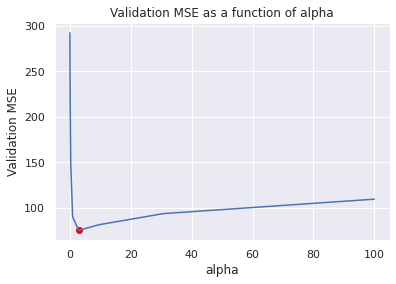

In [106]:
lp1 = sns.lineplot(x=list(alpha_to_mse_cv_dict.keys()), y=list(alpha_to_mse_cv_dict.values()))
plt.scatter(x=alpha_lowest_mse, y=mse_lowest, color="red")
plt.title("Validation MSE as a function of alpha")
plt.xlabel("alpha")
plt.ylabel("Validation MSE")
print("Lowest MSE for alpha = {}: {}".format(alpha_lowest_mse, round(mse_lowest, 3)))

In [107]:
data = data_happiness_suicide[["Suicides_per_100k", "Happiness", "GDP", "Family", "Health", "Freedom", "Trust", "Generosity"]]
data = data.reset_index(drop=True)

X = np.matrix(data[["Health", "GDP", "Family", "Health", "Freedom", "Trust", "Generosity"]])
y = np.array(data["Suicides_per_100k"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED)

#Ridge with mild regularization (alpha = 0.1)
mse_list, param_list = k_fold_cv(df=data, y_col_name="Suicides_per_100k", k=10, is_lasso=IS_LASSO, alpha=alpha_lowest_mse, seed=SEED)

best_mse = np.min(mse_list)
best_params = param_list[np.argmin(mse_list)]
print("best MSE: ", best_mse)
print("best params: ", best_params)

best MSE:  44.495073292253664
best params:  {'Happiness': 0.02296993923673515, 'GDP': 1.6120930215198086, 'Family': 0.0, 'Health': 0.0, 'Freedom': 0.0, 'Trust': 0.0, 'Generosity': 0.0}


In [108]:
model = OLS(y_train, X_train)
model_fitted = model.fit()
# Ridge
model_fitted_reg = model.fit_regularized(L1_wt=(1 if IS_LASSO else 0), alpha=alpha_lowest_mse, start_params=model_fitted.params)
params = dict(zip(feature_names, model_fitted_reg.params))
df_coefs = pd.DataFrame.from_dict(params.items())
df_coefs.columns = ["variable_name", "coefficient_value"]
df_coefs

,variable_name,coefficient_value
0,GDP,0.00000
1,Family,0.00000
2,Health,8.12084
3,Freedom,0.00000
4,Trust,0.00000
5,Generosity,0.00000


At the best alpha value, we can see that all but one coefficients got shrunk to 0. The only remaining non-zero coefficient turns out to be for Health.

100%|██████████| 200/200 [00:08<00:00, 24.26it/s]


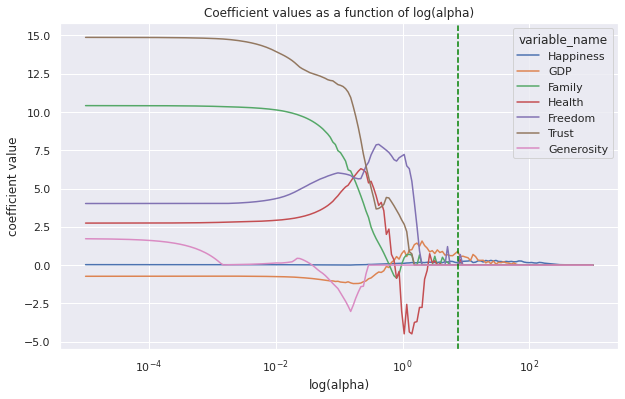

In [109]:
alpha_list = 10**np.linspace(-5, 3, 200)
plot_alpha_vs_coefficients(is_lasso=IS_LASSO, alpha_list=alpha_list, y_col_name="Suicides_per_100k")

For lasso regression, there is more variability as to when coefficient values are shrunk to 0. Visually, it's hard to determine the order of coefficient values shrinking. What's more, some coefficient values switch between positive and negative values, indicating a fair amount of model's "indecisiveness" as to their values.

### Summary
The analysis of happiness + suicide data for year 2015 allowed us to have a peek into whether there exist any relaitonships between happiness and suicide rates, as well as into the spatiality of suicide rates. The key conclusions are as follows:

1. There exist both positive and negative correlations between happiness-related variables and suicide rates, pointing to a lack of consistent relationship between happiness and suicide rates
2. All bivariate distributions of happiness-related variables and suicide rates have a fairly roud shape, indicating no clear relationships between them
3. Mean suicide rates vary widely across the world, both within continents and within regions
4. There is some degree of spatial autocorrelation between suicide rates in neighbouring countries / regions

## Conclusions

The above analysis of two datasets consisted of exploratory data analysis and inferential modelling. The most important conclusions we can draw are:

**1. Money is not as important as we think in making us happy**

**2. Good relationships and good health are important contributors to our happiness**

**3. The degree to which you're happy / likely to commit a suicide varies with where you live in the world**

**4. High / low suicide rates don't imply low / high happiness scores**